In [1]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import collections
import scipy.sparse as sp_sparse
import scipy.io
import csv
import ete3 as ete
import pickle

from pylab import *
from scipy import cluster

from scipy.stats import ks_2samp

In [2]:
dName = "20220727" # for saving figs

sName = "AM-DNA-258_TLS1"
sName2 = "AM-DNA-097_TLS1_allCells"
aCellName = "TLS_120h_rep1"
cellStateName = "TLS_120h_1"

fnameCellTypes = "/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/2_lineage_reconstruction/alleleTable.txt"
filenameNew = "/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/2_lineage_reconstruction/AM-DNA-097_lineage_table.txt"

In [3]:
clusterColorsFile = "/Genomics/chanlab/mchan/Adriano/TLS/TLS_TLSCL/20211102_clusterColorsTLSCL.p"
with open(clusterColorsFile,'rb') as fp:
    colorDict = pickle.load(fp)

In [4]:
df1 = pd.read_csv(filenameNew,sep="\t")
df1[0:10]

,cellBC,CTTAATTCGCATTT_r1,CTTAATTCGCATTT_r2,CTTAATTCGCATTT_r3,AACTATTACATATA_r1,AACTATTACATATA_r2,AACTATTACATATA_r3,GTCAGAACTTCTCC_r1,GTCAGAACTTCTCC_r2,GTCAGAACTTCTCC_r3,...,ATCCGACTTATATC_r3,TAACTTTTGAGACA_r1,TAACTTTTGAGACA_r2,TAACTTTTGAGACA_r3,TCTTCAATAGTTTT_r1,TCTTCAATAGTTTT_r2,TCTTCAATAGTTTT_r3,TGAGTGTAACACTG_r1,TGAGTGTAACACTG_r2,TGAGTGTAACACTG_r3
0,AAACCCACACTACCGG-1,[None],[None],[None],[None],[None],[None],[None],[158:22D],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCCAGTAGCACGA-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
2,AAACCCAGTCAACACT-1,[None],[164:18D],[None],[None],[None],[None],[None],[None],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACCCATCATGAAAG-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
4,AAACGAAAGGAATCGC-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
5,AAACGAACAAATGGTA-1,[None],[166:10D],[None],[None],[166:6D],[None],[104:13D],[163:67D],[163:67D],...,[None],[None],[155:19D],[None],[105:28D],[164:18D],[None],NaN,NaN,NaN
6,AAACGCTAGTAACGTA-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AAACGCTCATTGCCTC-1,[None],[None],[None],[None],[None],[None],[115:2D],[152:27D],[None],...,[None],NaN,NaN,NaN,[105:28D],[164:18D],[None],NaN,NaN,NaN
8,AAACGCTTCGCAACAT-1,[None],[None],[None],[None],[155:19D],[None],[116:1D],[168:23I]GACCCAACTATGACACGGATGAA,[None],...,[None],NaN,NaN,NaN,[None],NaN,NaN,NaN,NaN,NaN
9,AAAGAACTCAAATAGG-1,[113:12D],[165:1D],[None],[None],[168:4D],[None],[106:12D],[168:4I]TTTT,[None],...,[None],[110:3D],[166:2D],[None],NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1["cellBC1"] = aCellName + "_" + df1["cellBC"]
df1.set_index("cellBC1",inplace=True)
df1.drop("cellBC",axis=1,inplace=True)
n = df1.shape[0]

#print(df1.shape)
df1[0:10]

,CTTAATTCGCATTT_r1,CTTAATTCGCATTT_r2,CTTAATTCGCATTT_r3,AACTATTACATATA_r1,AACTATTACATATA_r2,AACTATTACATATA_r3,GTCAGAACTTCTCC_r1,GTCAGAACTTCTCC_r2,GTCAGAACTTCTCC_r3,TTAACTGCCCGCTT_r1,...,ATCCGACTTATATC_r3,TAACTTTTGAGACA_r1,TAACTTTTGAGACA_r2,TAACTTTTGAGACA_r3,TCTTCAATAGTTTT_r1,TCTTCAATAGTTTT_r2,TCTTCAATAGTTTT_r3,TGAGTGTAACACTG_r1,TGAGTGTAACACTG_r2,TGAGTGTAACACTG_r3
cellBC1,,,,,,,,,,,,,,,,,,,,,
TLS_120h_rep1_AAACCCACACTACCGG-1,[None],[None],[None],[None],[None],[None],[None],[158:22D],[None],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACCCAGTAGCACGA-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACCCAGTCAACACT-1,[None],[164:18D],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACCCATCATGAAAG-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACGAAAGGAATCGC-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],[None],[None],[None],NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACGAACAAATGGTA-1,[None],[166:10D],[None],[None],[166:6D],[None],[104:13D],[163:67D],[163:67D],[None],...,[None],[None],[155:19D],[None],[105:28D],[164:18D],[None],NaN,NaN,NaN
TLS_120h_rep1_AAACGCTAGTAACGTA-1,[None],[None],[None],[None],[None],[None],[None],[None],[None],[None],...,[None],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TLS_120h_rep1_AAACGCTCATTGCCTC-1,[None],[None],[None],[None],[None],[None],[115:2D],[152:27D],[None],[None],...,[None],NaN,NaN,NaN,[105:28D],[164:18D],[None],NaN,NaN,NaN
TLS_120h_rep1_AAACGCTTCGCAACAT-1,[None],[None],[None],[None],[155:19D],[None],[116:1D],[168:23I]GACCCAACTATGACACGGATGAA,[None],[None],...,[None],NaN,NaN,NaN,[None],NaN,NaN,NaN,NaN,NaN


In [6]:
df1.shape

(3210, 30)

In [7]:
aColNames = df1.columns[range(0,df1.shape[1],3)].tolist()
aColNames

['CTTAATTCGCATTT_r1',
 'AACTATTACATATA_r1',
 'GTCAGAACTTCTCC_r1',
 'TTAACTGCCCGCTT_r1',
 'CAGCACGGGGTGCG_r1',
 'ACTTCTGTAATGTG_r1',
 'ATCCGACTTATATC_r1',
 'TAACTTTTGAGACA_r1',
 'TCTTCAATAGTTTT_r1',
 'TGAGTGTAACACTG_r1']

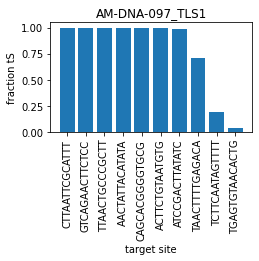

In [8]:
mask = df1[aColNames].isnull() == False
maskSum = mask.sum(axis=0)

maskSum1 = maskSum/df1.shape[0]
ms = maskSum1.sort_values(ascending=False)
aIntBCs = [i.split("_")[0] for i in ms.index.tolist()]

h = plt.figure(figsize=(4,4))
plt.bar(np.arange(10),ms)
plt.ylim([0,1.05])
plt.ylabel("fraction tS")
plt.xlabel("target site")
plt.title(sName)
plt.xticks([i for i in range(len(aIntBCs))], aIntBCs, rotation=90)
plt.subplots_adjust(left=0.2,bottom=0.5)
#plt.savefig("/Genomics/chanlab/mchan/Adriano/TLS/TLS_1_2/plots/20220224_{}_tSCapture.pdf".format(sName))

In [9]:
aIntBCs

['CTTAATTCGCATTT',
 'GTCAGAACTTCTCC',
 'TTAACTGCCCGCTT',
 'AACTATTACATATA',
 'CAGCACGGGGTGCG',
 'ACTTCTGTAATGTG',
 'ATCCGACTTATATC',
 'TAACTTTTGAGACA',
 'TCTTCAATAGTTTT',
 'TGAGTGTAACACTG']

In [10]:
aIntBCs_cutSites = [i + j for i in aIntBCs for j in ["_r1","_r2","_r3"] ]

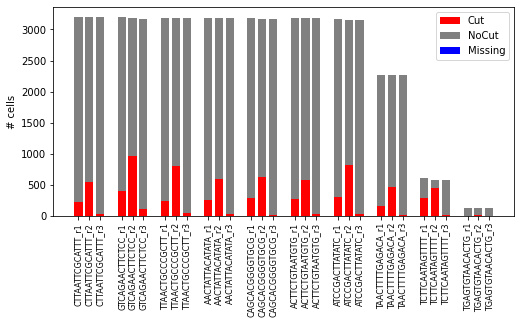

In [11]:
# indel histograms
maskNA = df1[aIntBCs_cutSites].isnull() == True
maskNASum = maskNA.sum(axis=0)
maskNone = df1[aIntBCs_cutSites]=="[None]"
maskNoneSum = maskNone.sum(axis=0)
maskMiss = df1[aIntBCs_cutSites]=="Missing"
maskMissSum = maskMiss.sum(axis=0)
maskTotal1 = maskNASum+maskNoneSum+maskMissSum
maskCutSum = df1.shape[0]-maskTotal1

l = []
x = 0
for i in np.arange(1,len(maskMissSum)+1):
    l.append(x)
    x=x+1
    if i%3==0:
        x=x+1

h = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
plt.bar(l,maskCutSum,0.75,label="Cut",color="Red")
plt.bar(l,maskNoneSum,0.75,bottom=maskCutSum+maskMissSum,label="NoCut",color="Grey")
plt.bar(l,maskMissSum,0.75,bottom=maskCutSum,label="Missing",color="Blue")
x1 = plt.xticks(l, aIntBCs_cutSites, rotation=90,fontsize=8)
plt.ylabel("# cells")
plt.legend(loc="upper right")

plt.subplots_adjust(left=0.1,bottom=0.3)
#plt.savefig("/Genomics/chanlab/mchan/Adriano/TLS/TLS_1_2/plots/20220224_{}_alleleHist.pdf".format(sName))

In [6]:
import scanpy as sc
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import seaborn as sns
from copy import copy

In [7]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

2022-12-07 19:47:20.776476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 19:47:21.289630: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 19:47:21.375315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/gcc/7.2.0/lib64
2022-12-07 19:47:21.375350: I tensorflow/stream_executor/cuda/cudart_

scanpy==1.8.2 anndata==0.7.5 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [8]:
Greens = copy(mpl.cm.Greens)
Greens.set_under("lightgray")
Reds = copy(mpl.cm.Reds)
Reds.set_under("lightgray")

In [9]:
TLS_TLSCL = sc.read_h5ad('/Genomics/chanlab/blaw/TLS/raw_data/scRNA/TLSCL/TLS_TLSCL.h5ad')

In [12]:
#TLS1 = sc.read_h5ad('/Genomics/chanlab/blaw/TLS/raw_data/scRNA/TLS12/TLS_120h_1.h5ad')

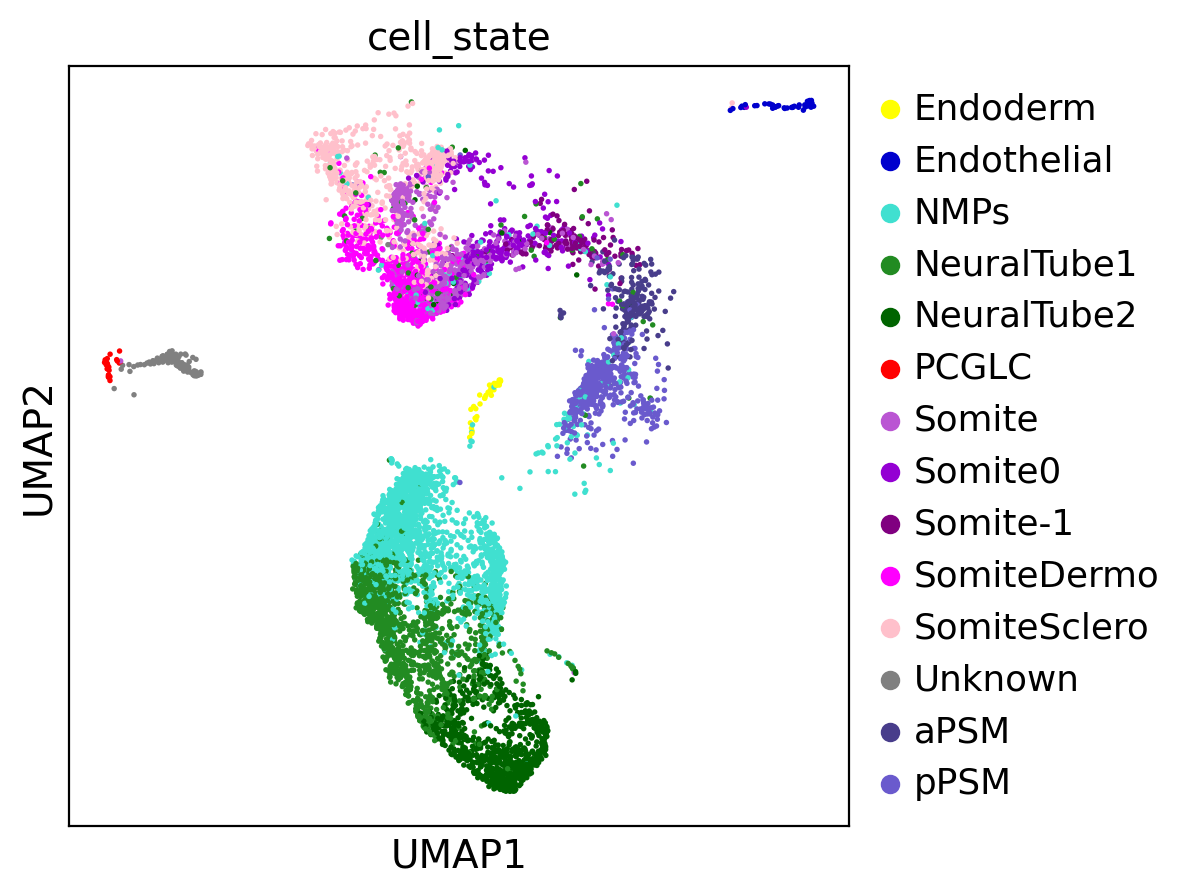

In [12]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS_TLSCL, color='cell_state', palette = colorDict, save = 'TLS_TLSCL_cell_state.pdf')

In [14]:
TLS_TLSCL.obs

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.0.5,seurat_clusters,UMAP_1,UMAP_2,BC,S.Score,G2M.Score,...,prediction.score.Seurat_7,prediction.score.Seurat_11,prediction.score.Seurat_12,prediction.score.Seurat_14,prediction.score.Seurat_15,prediction.score.Seurat_10,prediction.score.max,cellBC,MultiSeqBCseq,MultiSeqGroup
TLS_TLSCL_AAACCCAAGGTAATCA-1,TLS_TLSCL,30411.0,5189,NA,Seurat_9,NaN,NaN,NA,0.236232,-0.195609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.522257,AAACCCAAGGTAATCA,CTAGCTGA,CTAGCTGA
TLS_TLSCL_AAACCCAGTCTCTCAC-1,TLS_TLSCL,34235.0,5157,NA,Seurat_9,NaN,NaN,NA,-0.065781,-0.073320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.585322,AAACCCAGTCTCTCAC,GGCTAACT,GGCTAACT
TLS_TLSCL_AAACCCATCGAGCCTG-1,TLS_TLSCL,18851.0,3891,NA,Seurat_6,NaN,NaN,NA,0.247439,-0.203833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.988354,AAACCCATCGAGCCTG,ATAGCGTC,ATAGCGTC
TLS_TLSCL_AAACCCATCGGTTCAA-1,TLS_TLSCL,21254.0,4500,NA,Seurat_0,NaN,NaN,NA,-0.074428,0.112925,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,AAACCCATCGGTTCAA,GACACTAC,GACACTAC
TLS_TLSCL_AAACCCATCTGGTTGA-1,TLS_TLSCL,17095.0,3699,NA,Seurat_0,NaN,NaN,NA,0.006374,-0.282756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.498073,AAACCCATCTGGTTGA,TAACTGGC,TAACTGGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLS_TLSCL_TTTGTTGCATGGTACT-1,TLS_TLSCL,12324.0,3408,NA,Seurat_8,NaN,NaN,NA,-0.303736,0.294818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.646447,TTTGTTGCATGGTACT,AGCGCTGC,AGCGCTGC
TLS_TLSCL_TTTGTTGGTCATCCGG-1,TLS_TLSCL,29183.0,4748,NA,Seurat_4,NaN,NaN,NA,0.002999,-0.010508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.831154,TTTGTTGGTCATCCGG,GTCTCAAG,GTCTCAAG
TLS_TLSCL_TTTGTTGGTCGATTAC-1,TLS_TLSCL,14442.0,3750,NA,Seurat_0,NaN,NaN,NA,0.132404,-0.036095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.657391,TTTGTTGGTCGATTAC,TCACAGCA,TCACAGCA
TLS_TLSCL_TTTGTTGGTTTCTTAC-1,TLS_TLSCL,21626.0,4122,NA,Seurat_9,NaN,NaN,NA,0.093729,-0.292040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.598462,TTTGTTGGTTTCTTAC,GACGTCGC,GACGTCGC


In [24]:
multiSeq_df = pd.read_csv('/Genomics/chanlab/blaw/TLS/metadata/multiseq_barcodes.txt', sep = '\t')

In [28]:
multiSeq_df.loc[len(multiSeq_df.index)] = ['Doublet', 'Doublet', 'Doublet'] 
multiSeq_df.loc[len(multiSeq_df.index)] = ['Negative', 'Negative', 'Negative'] 

multiSeq_df.set_index('Sequence', inplace = True)
multiSeq_df['TLS_TLSCL'] = multiSeq_df['TLS ID'].str.replace('\d+', '')

/tmp/ipykernel_70775/1821491454.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  multiSeq_df['TLS_TLSCL'] = multiSeq_df['TLS ID'].str.replace('\d+', '')


In [44]:
multiSeq_dict = dict(zip(multiSeq_df.index.values, multiSeq_df['TLS_TLSCL']))
multiSeqBC_dict = dict(zip(multiSeq_df.index.values, multiSeq_df['ID']))

In [34]:
multiSeq_dict

{'AGAGAGAG': 'TLS',
 'TCACAGCA': 'TLS',
 'GAAAAGGG': 'TLSCL',
 'ATAGCGTC': 'TLS',
 'GAATCTCG': 'TLS',
 'CTAGCTGA': 'TLSCL',
 'CCATGGCG': 'TLS',
 'AAAGGGGA': 'TLS',
 'TTACGGTG': 'TLSCL',
 'TAACTGGC': 'TLS',
 'CCAGTTAG': 'TLS',
 'GGCTAACT': 'TLSCL',
 'CGCTATGA': 'TLS',
 'ACCGATTG': 'TLSCL',
 'GTCTCAAG': 'TLSCL',
 'GACACTAC': 'TLS',
 'AGCGCTGC': 'TLSCL',
 'CCCAGGAC': 'TLS',
 'AACTGGCT': 'TLSCL',
 'TTCGGGGC': 'TLSCL',
 'TCCTTCCT': 'TLS',
 'GACGTCGC': 'TLSCL',
 'CTCCTCTT': 'TLSCL',
 'Doublet': 'Doublet',
 'Negative': 'Negative'}

In [45]:
TLS_TLSCL.obs['MultiSeqID'] = TLS_TLSCL.obs['MultiSeqBCseq']

In [46]:
TLS_TLSCL.obs.replace({"MultiSeqID": multiSeqBC_dict}, inplace = True)

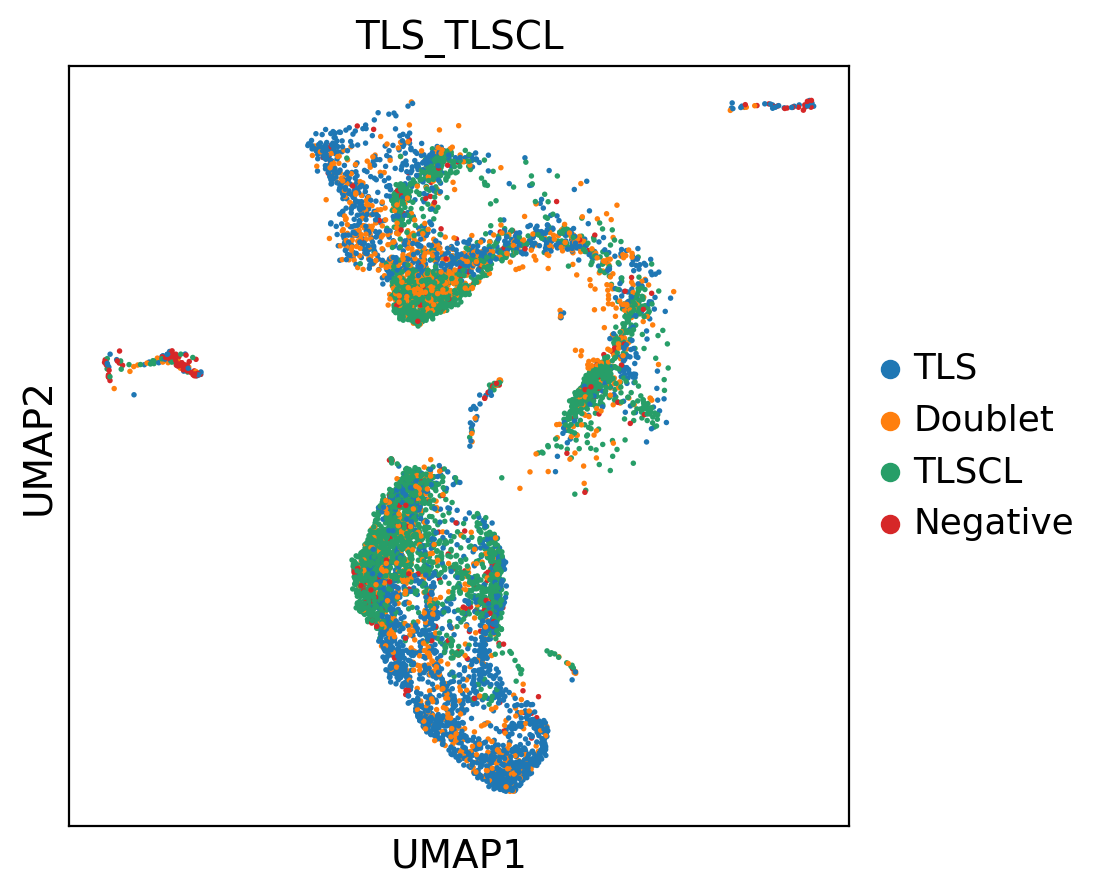

In [40]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS_TLSCL, color='TLS_TLSCL', save = 'TLS_TLSCL.pdf')

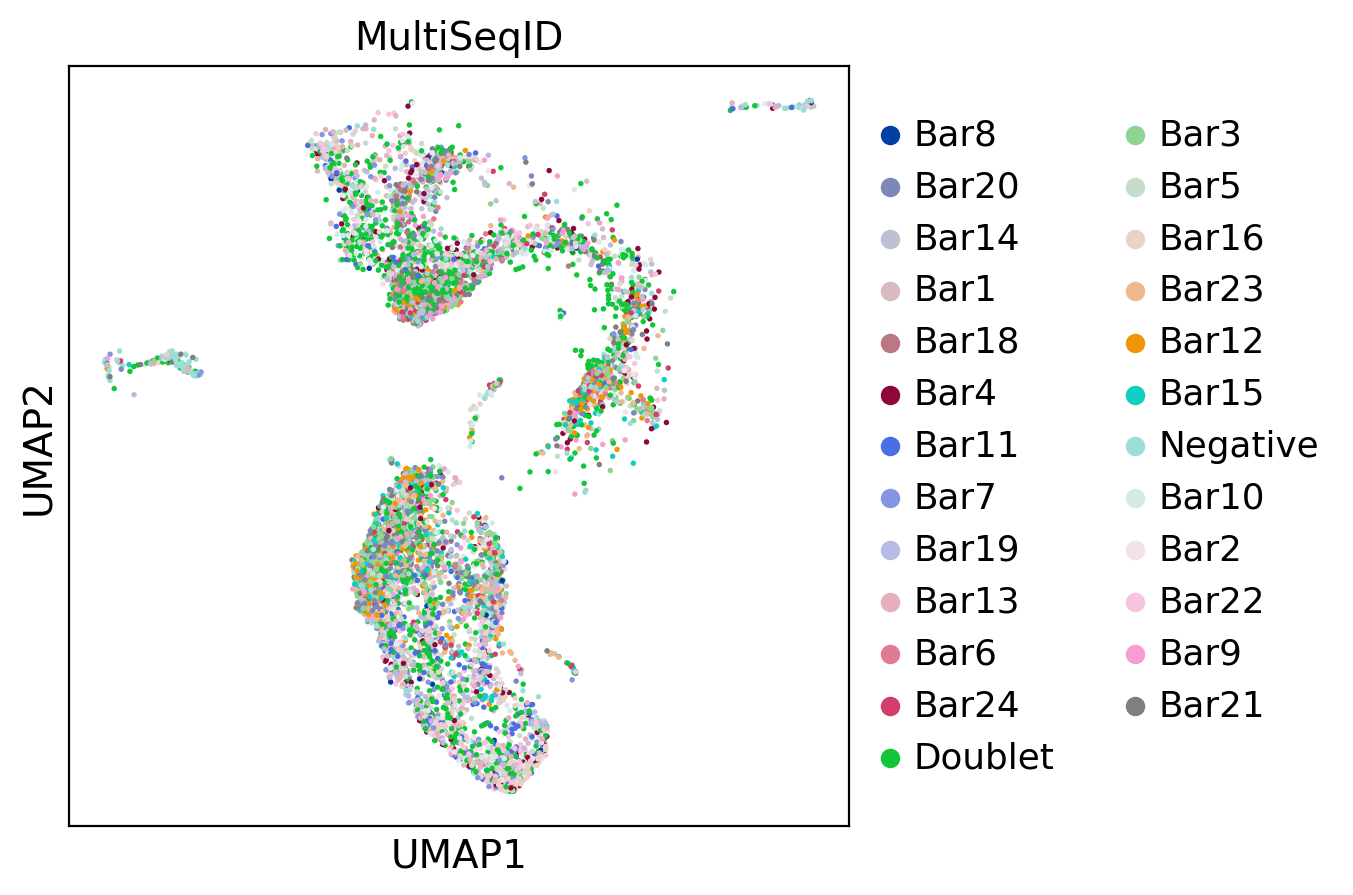

In [47]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS_TLSCL, color='MultiSeqID', save = 'TLS_TLSCL_MultiSeqID.pdf')

/usr/local/python/3.9.11-mmchan/lib/python3.9/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


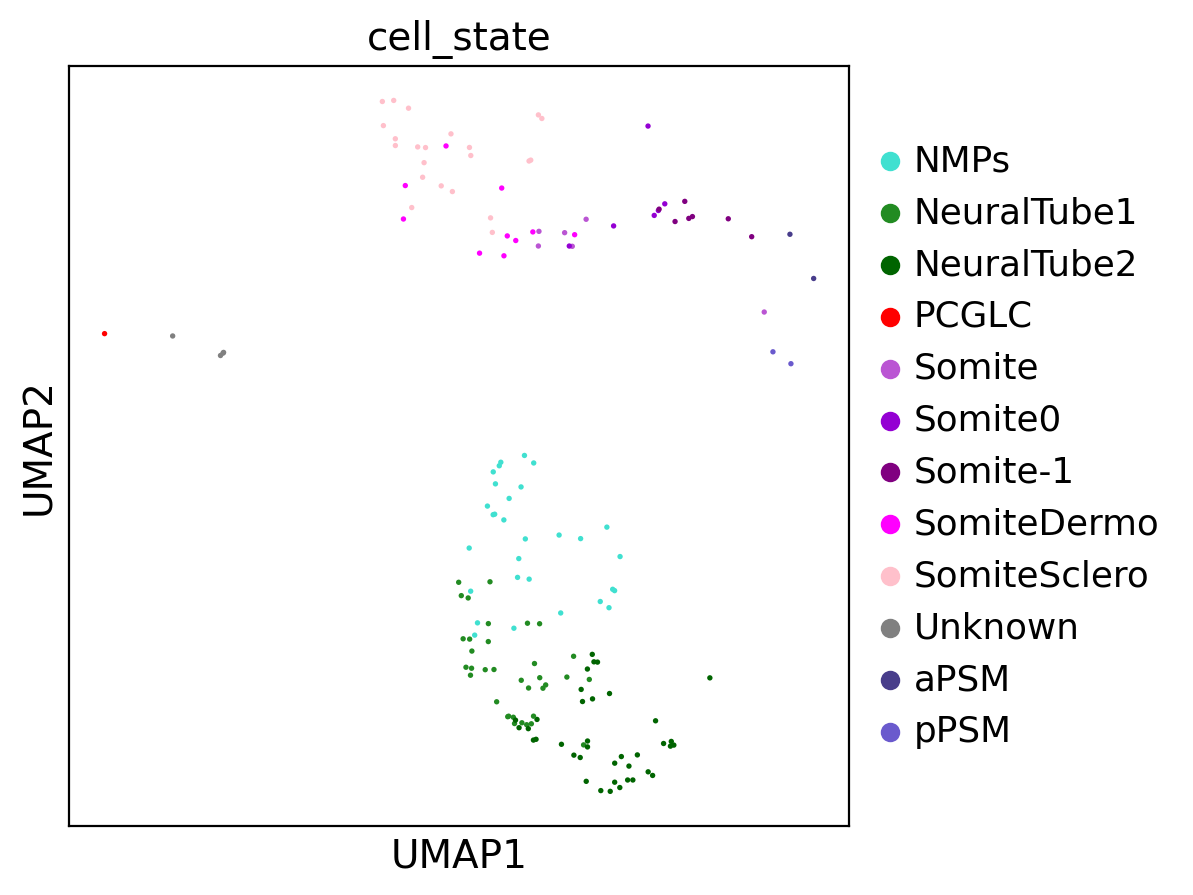

In [54]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS_TLSCL[TLS_TLSCL.obs['MultiSeqID'] == 'Bar7'], color='cell_state', size = 15, save = 'TLS_TLSCL_MultiSeqID.pdf')

/usr/local/python/3.9.11-mmchan/lib/python3.9/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


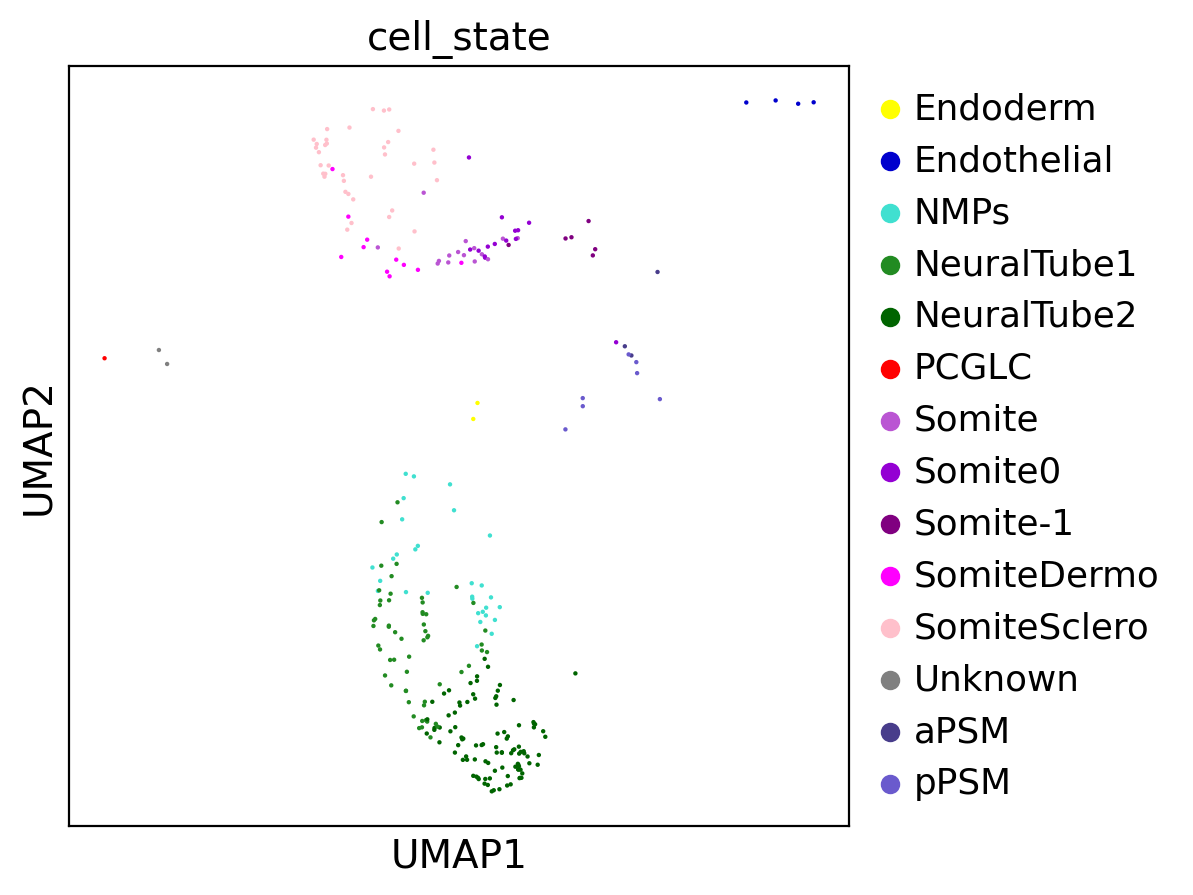

In [52]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS_TLSCL[TLS_TLSCL.obs['MultiSeqID'] == 'Bar22'], color='cell_state', size = 10, save = 'TLS_TLSCL_MultiSeqID.pdf')

In [18]:
maskPresent = df1[aIntBCs_cutSites].isnull() == False
maskPresentSum = maskPresent.sum(axis=1)
maskNone = df1[aIntBCs_cutSites]=="[None]"
maskNoneSum = maskNone.sum(axis=1)
maskMiss = df1[aIntBCs_cutSites]=="Missing"
maskMissSum = maskMiss.sum(axis=1)
maskCutSum = maskPresentSum-maskNoneSum-maskMissSum

pctCut = maskCutSum/maskPresentSum
#pctCut[0:10]

In [19]:
TLS1.obs = pd.concat([TLS1.obs,pctCut],axis=1)
TLS1.obs.rename(columns={0:"pctCut"},inplace=True)

In [20]:
mask = df1[aColNames].isnull() == False
maskSum = mask.sum(axis=1)
TLS1.obs["numTargetSites"] = maskSum.loc[maskSum.index]

mask = (df1.isnull() == False) & (df1!="[None]") & (df1!="Missing")
maskSum = mask.sum(axis=1)
TLS1.obs["numIndels"] = maskSum.loc[maskSum.index]

In [21]:
TLS1.obs[0:5]

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.0.5,seurat_clusters,UMAP_1,UMAP_2,BC,S.Score,G2M.Score,...,prediction.score.Seurat_10,prediction.score.Seurat_11,prediction.score.Seurat_12,prediction.score.Seurat_13,prediction.score.Seurat_14,prediction.score.Seurat_15,prediction.score.max,pctCut,numTargetSites,numIndels
TLS_120h_rep1_AAACCCACACTACCGG-1,TLS_120h_rep1,25883.0,4987,NA,Seurat_12,NaN,NaN,NA,0.039316,-0.037742,...,0.0,0.000000,0.954352,0.0,0.0,0.0,0.954352,0.047619,7.0,1.0
TLS_120h_rep1_AAACCCAGTAGCACGA-1,TLS_120h_rep1,27861.0,4976,NA,Seurat_9,NaN,NaN,NA,0.091867,-0.070693,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.920567,0.000000,8.0,0.0
TLS_120h_rep1_AAACCCAGTCAACACT-1,TLS_120h_rep1,20013.0,4421,NA,Seurat_1,NaN,NaN,NA,0.152129,-0.141526,...,0.0,0.003519,0.000000,0.0,0.0,0.0,0.723794,0.142857,7.0,3.0
TLS_120h_rep1_AAACCCATCATGAAAG-1,TLS_120h_rep1,24132.0,4579,NA,Seurat_0,NaN,NaN,NA,0.019673,-0.085390,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.723027,0.000000,8.0,0.0
TLS_120h_rep1_AAACGAAAGGAATCGC-1,TLS_120h_rep1,18991.0,4040,NA,Seurat_0,NaN,NaN,NA,-0.101222,-0.184577,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.834519,0.000000,8.0,0.0


### Plot the tree metrics over the UMAPs

... storing 'orig.ident' as categorical
... storing 'integrated_snn_res.0.5' as categorical
... storing 'seurat_clusters' as categorical
... storing 'BC' as categorical
... storing 'Phase' as categorical
... storing 'old.ident' as categorical
... storing 'integrated_snn_res.0.8' as categorical
... storing 'cluster' as categorical
... storing 'cell_state' as categorical
... storing 'predicted.id' as categorical


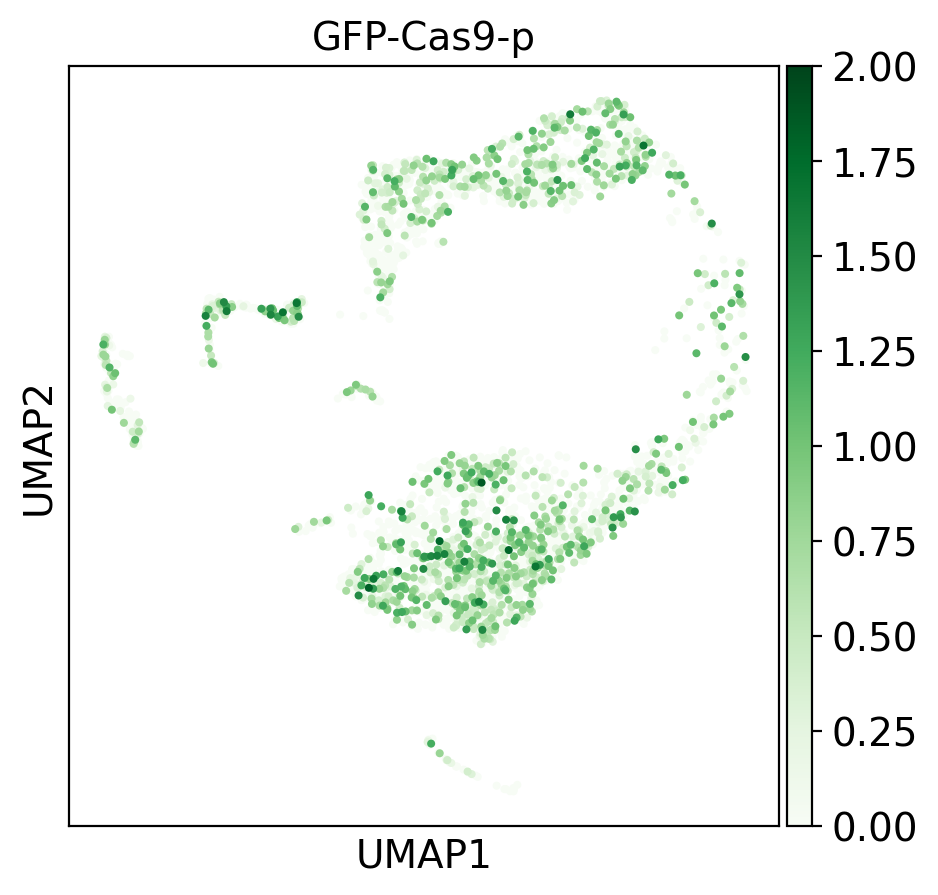

In [23]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color=['GFP-Cas9-p'], cmap = Greens, use_raw = False, vmin = 0, vmax = 2, legend_loc = None, save = 'GFP_Expression_per_Cell.pdf')

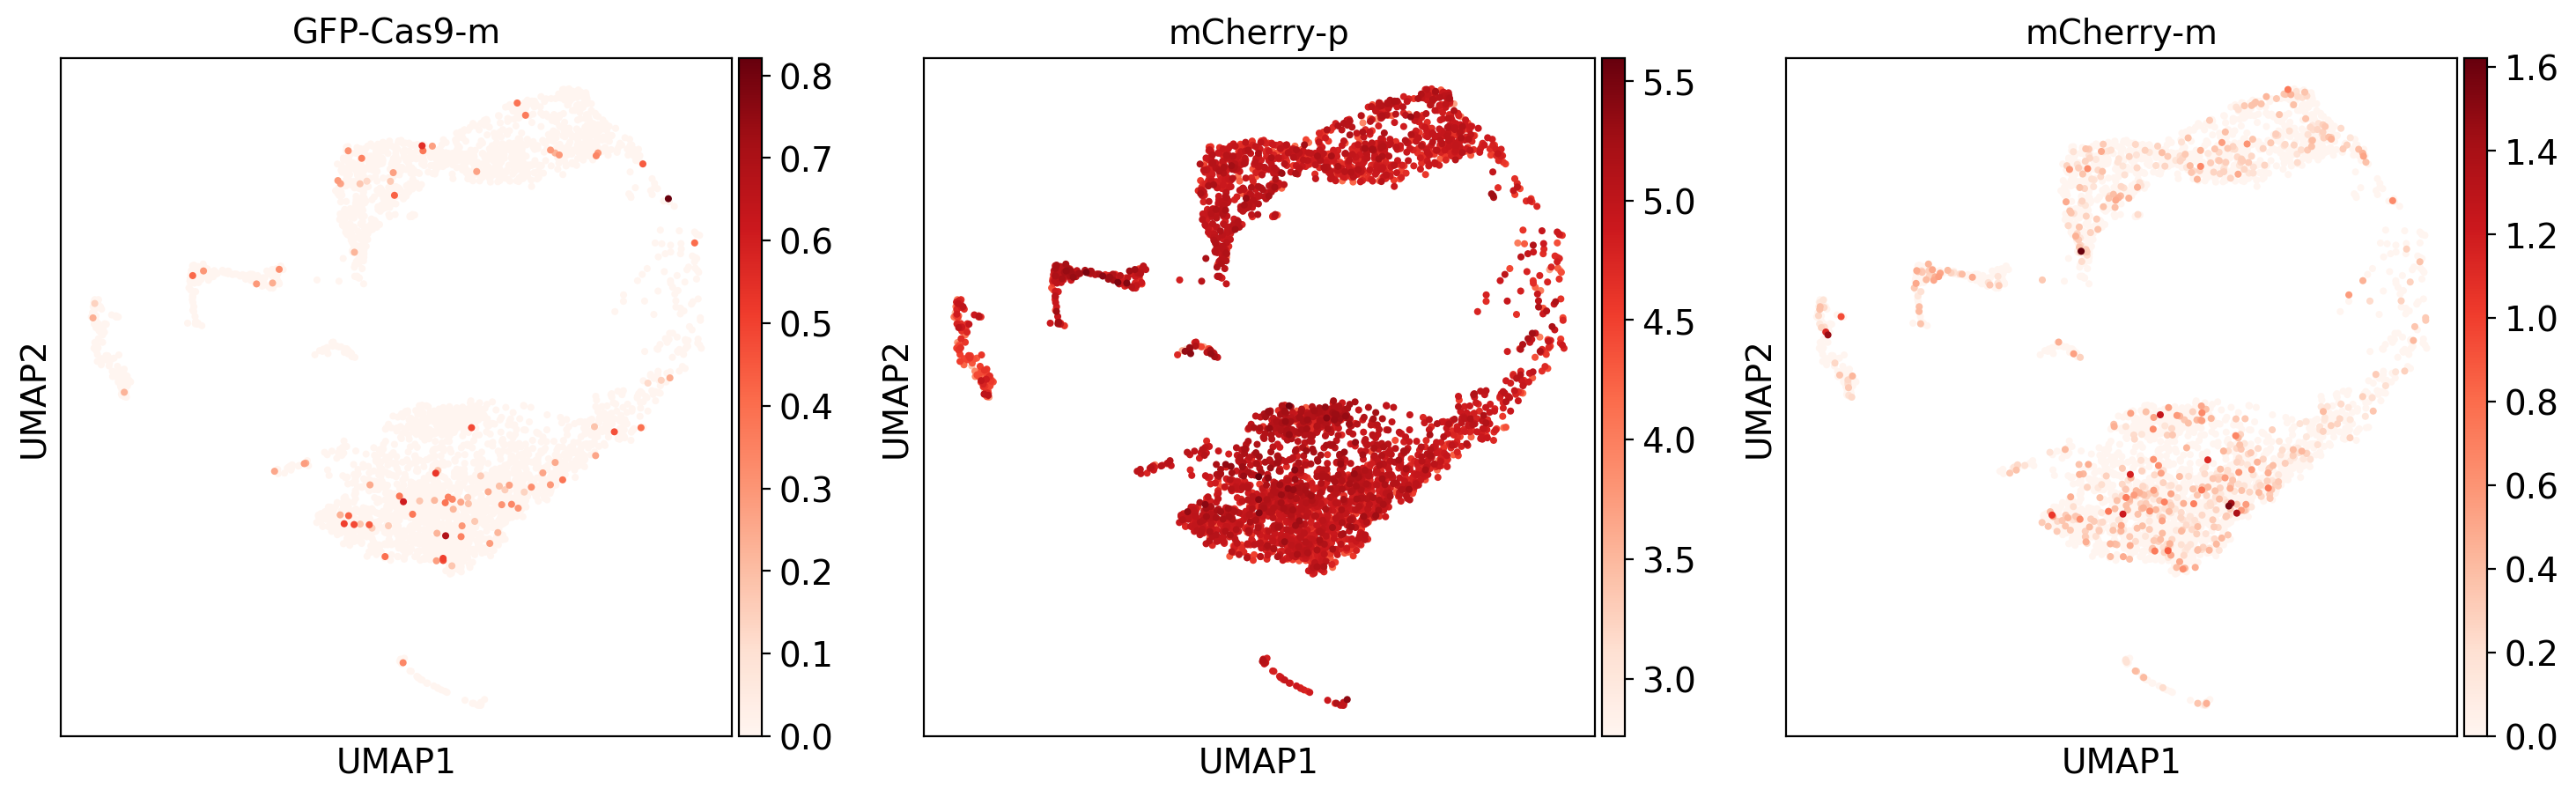

In [24]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color=['GFP-Cas9-m',"mCherry-p",'mCherry-m'], cmap = Reds, use_raw = False)

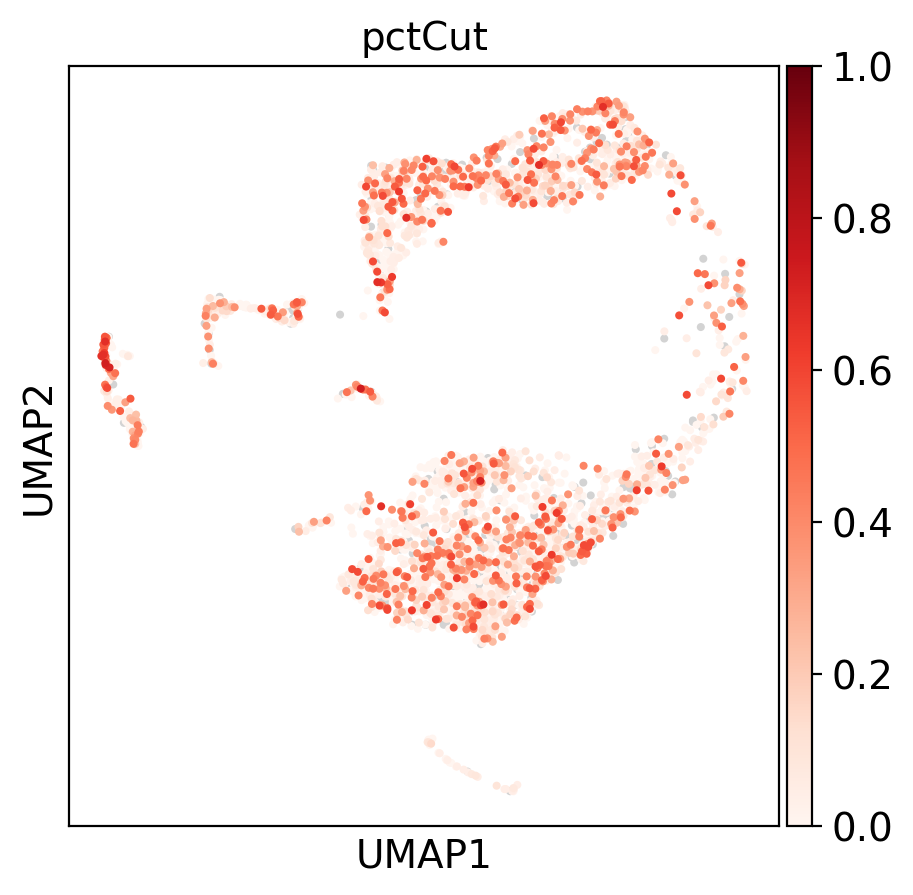

In [25]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color='pctCut', cmap = Reds, use_raw = False, vmin = 0, vmax = 1, save = 'Percent_Cut_per_Cell.pdf')

... storing 'orig.ident' as categorical
... storing 'integrated_snn_res.0.5' as categorical
... storing 'seurat_clusters' as categorical
... storing 'BC' as categorical
... storing 'Phase' as categorical
... storing 'old.ident' as categorical
... storing 'integrated_snn_res.0.8' as categorical
... storing 'cluster' as categorical
... storing 'cell_state' as categorical
... storing 'predicted.id' as categorical


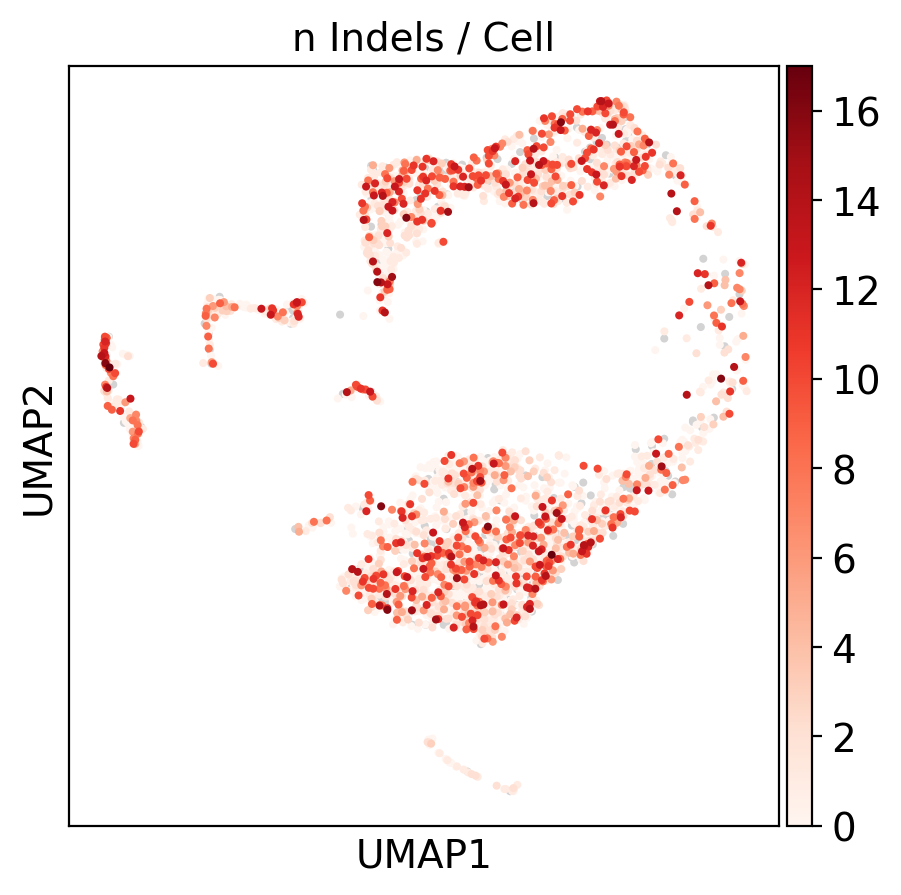

In [21]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color='numIndels', title = 'n Indels / Cell', cmap = Reds, use_raw = False)

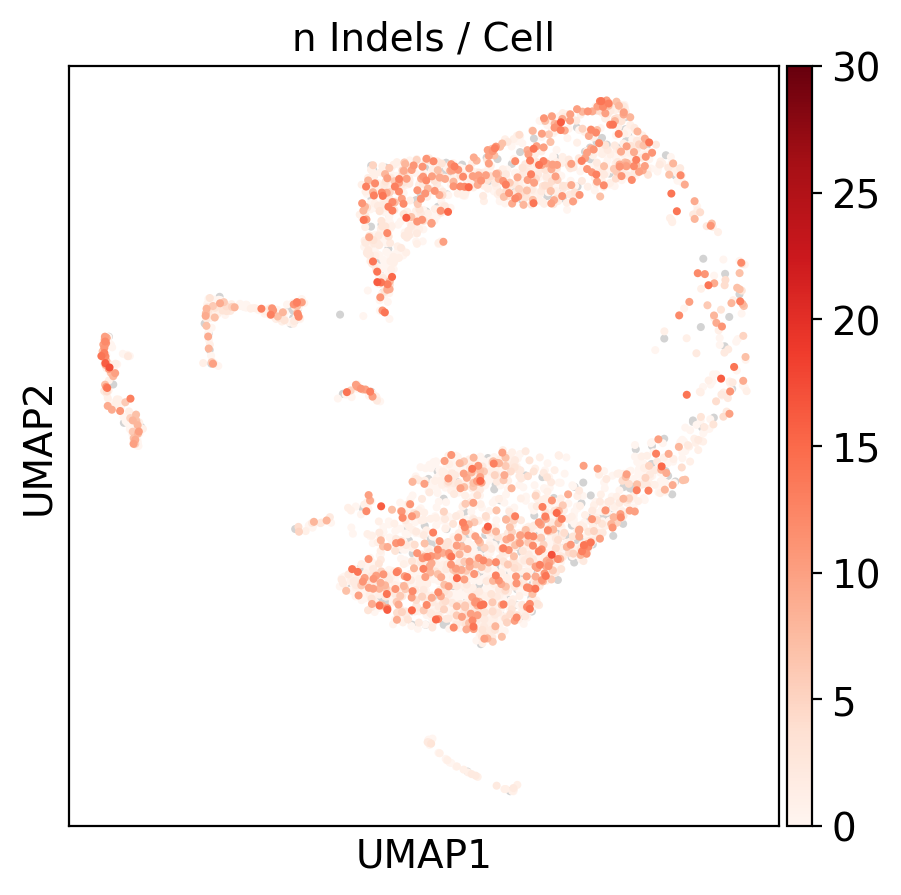

In [22]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color='numIndels', title = 'n Indels / Cell', cmap = Reds, use_raw = False, vmin = 0, vmax = 30, save = 'Indels_per_Cell.pdf')

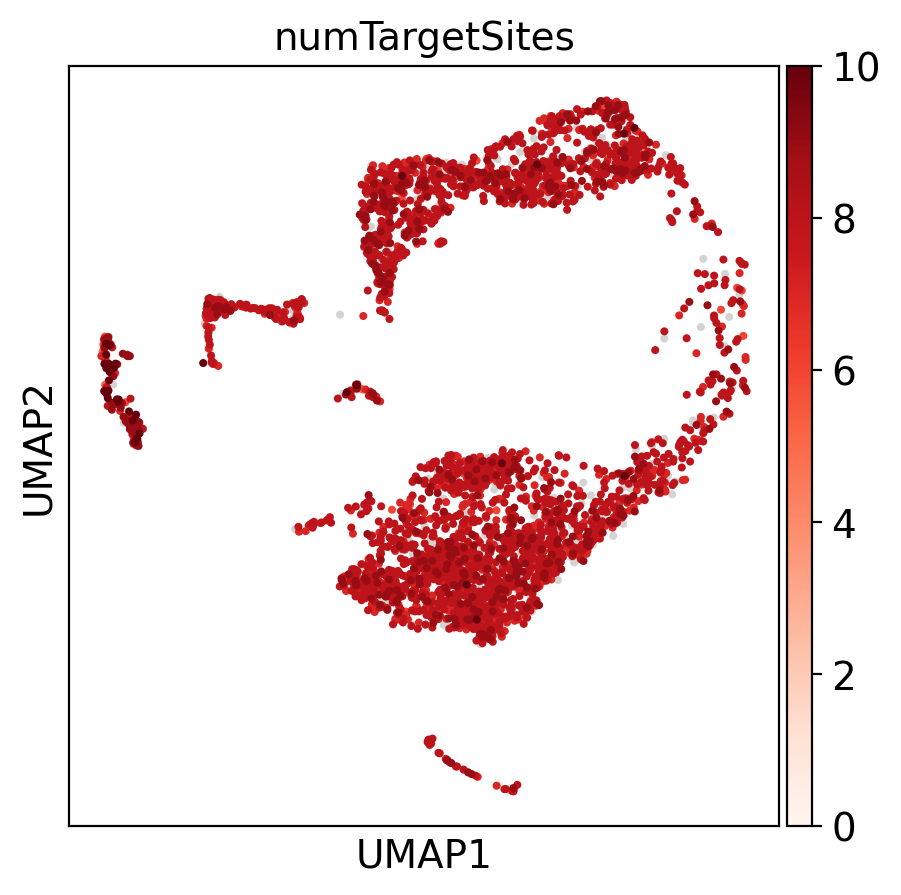

In [27]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(TLS1, color='numTargetSites', cmap = Reds, use_raw = False, vmin = 0, vmax = 10, save = 'n_Target_Sites_per_Cell.pdf')

### Plot histograms of the tree metrics (in GFP+ or GFP- cells)

In [27]:
count = 0
for row in TLS1.var.iterrows():
    if row[1]['features'] == 'GFP-Cas9-p':
        break
    else:
        count += 1
        
print ('The loc of GFP-Cas9-p is:', count)

GFP_expr = TLS1.X[:,21473]
GFP_expr = GFP_expr.todense()

The loc of GFP-Cas9-p is: 21473


In [28]:
# Add GFP positive and pctCut positive columns
TLS1.obs['GFP-Cas9-p'] = GFP_expr
TLS1.obs["GFP_pos"] = 0
x1 = TLS1.obs[TLS1.obs["GFP-Cas9-p"]>0].index.tolist()
TLS1.obs.loc[x1,"GFP_pos"]=1

TLS1.obs["pctCut_pos"] = 0
x1 = TLS1.obs[TLS1.obs["pctCut"]>0].index.tolist()
TLS1.obs.loc[x1,"pctCut_pos"]=1

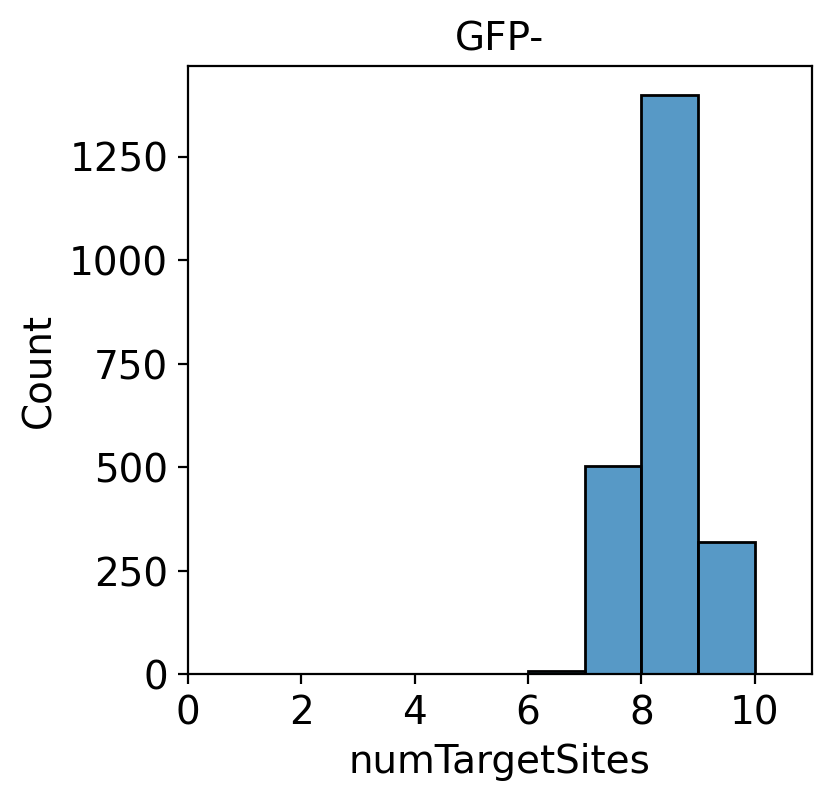

In [29]:
fig= plt.subplots
ax1 = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 0], x = 'numTargetSites', binwidth = 1, bins = 10)
ax1.set_xlim(0, 11)
ax1.set_xticks([0, 2, 4, 6, 8, 10])
ax1.grid(False)
ax1.set_title('GFP-')

plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/n_target_sites_GFP-_hist.pdf', dpi = 300)
plt.show()
plt.close()

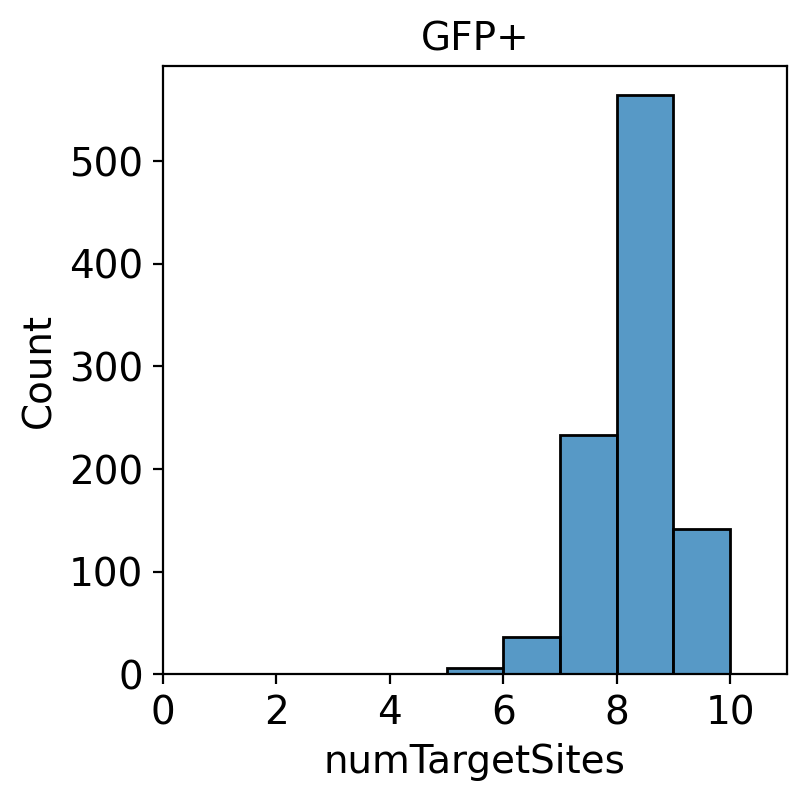

In [30]:
fig= plt.subplots
ax1 = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 1], x = 'numTargetSites', binwidth = 1, bins = 10)
ax1.set_xlim(0, 11)
ax1.set_xticks([0, 2, 4, 6, 8, 10])
ax1.grid(False)
ax1.set_title('GFP+')

plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/n_target_sites_GFP+_hist.pdf', dpi = 300)
plt.show()
plt.close()

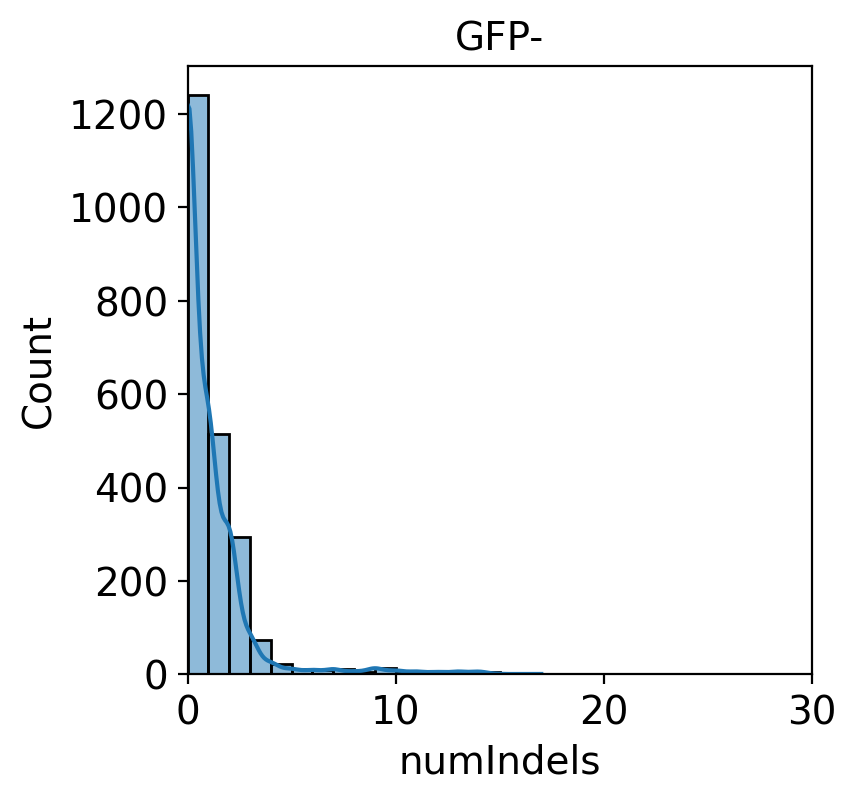

In [31]:
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 0], x = 'numIndels', binwidth = 1, kde = True, fill = True)
ax.set_xlim(0, 30)
ax.grid(False)
ax.set_title('GFP-')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/n_Indels_GFP-_hist.pdf', dpi = 300)
plt.show()
plt.close()

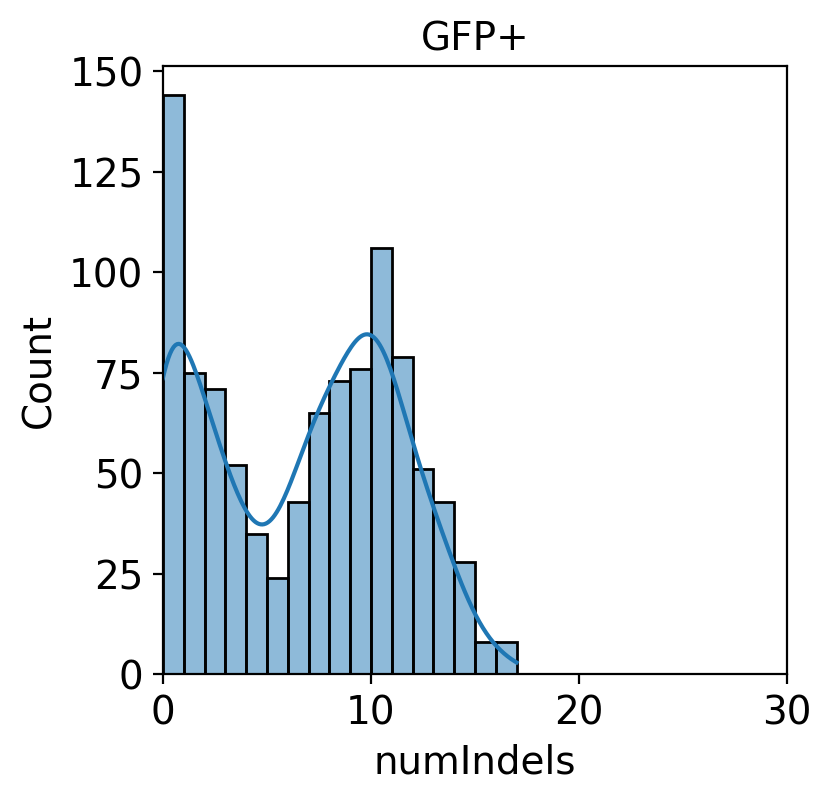

In [32]:
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 1], x = 'numIndels', binwidth = 1, kde = True, fill = True)
ax.set_xlim(0, 30)
ax.grid(False)
ax.set_title('GFP+')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/n_Indels_GFP+_hist.pdf', dpi = 300)
plt.show()
plt.close()

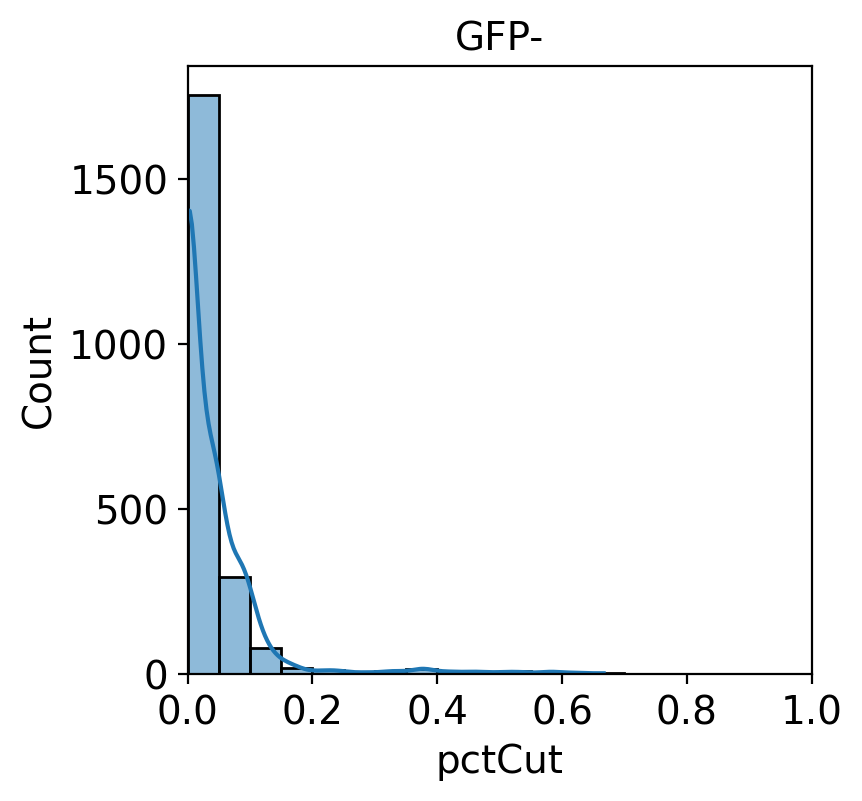

In [33]:
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 0], x = 'pctCut', binwidth = 0.05, kde = True)
ax.set_xlim(0, 1)
ax.grid(False)
ax.set_title('GFP-')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/PctCut_GFP-_hist.pdf', dpi = 300)
plt.show()
plt.close()

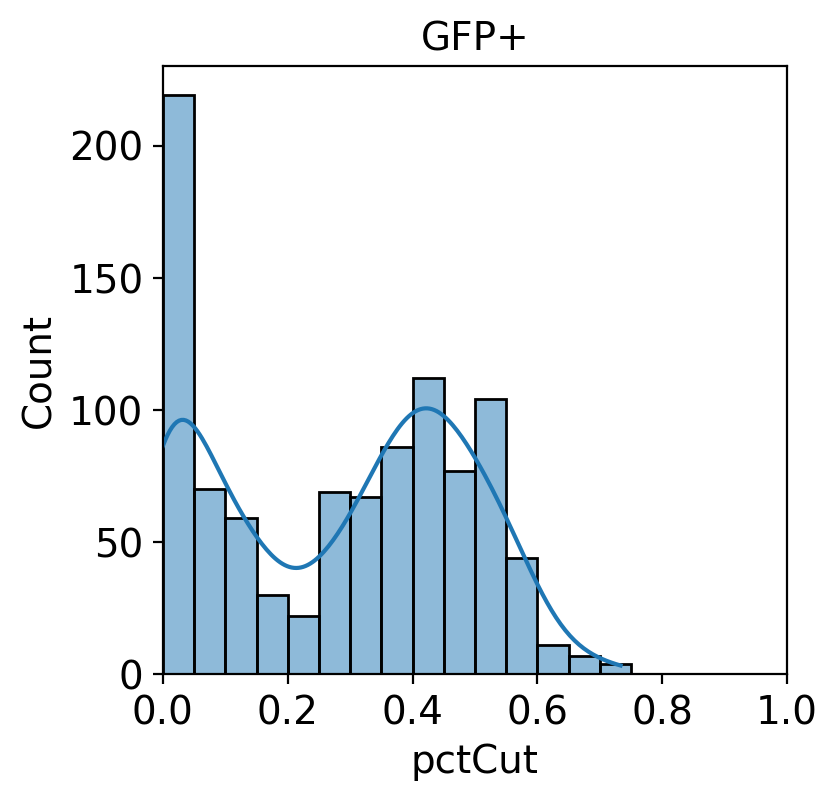

In [34]:
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 1], x = 'pctCut', binwidth = 0.05, kde = True)
ax.set_xlim(0, 1)
ax.grid(False)
ax.set_title('GFP+')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/PctCut_GFP+_hist.pdf', dpi = 300)
plt.show()
plt.close()

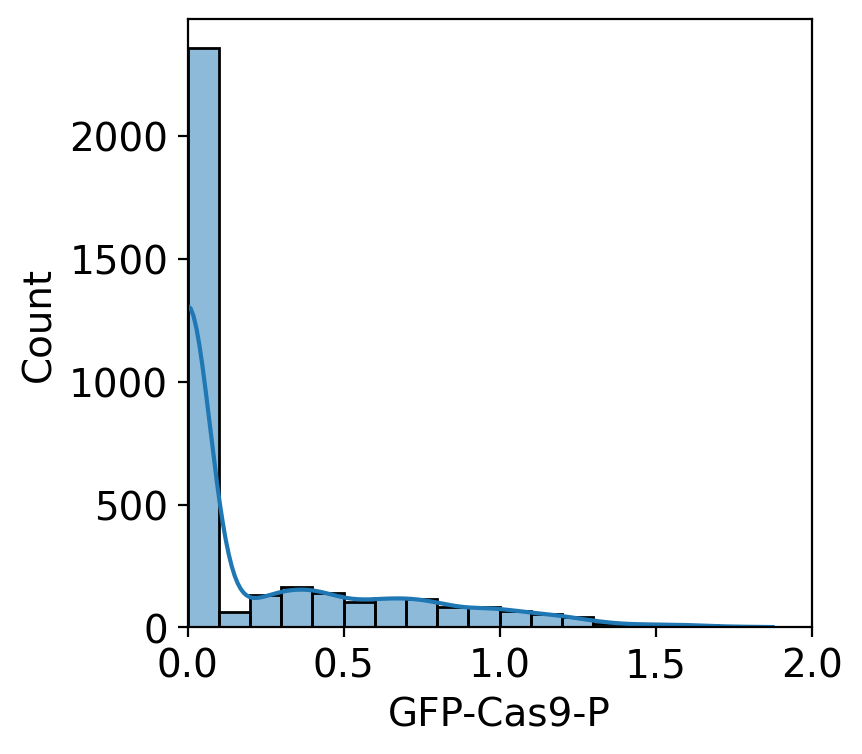

In [36]:
fig = plt.figure()
#plt.plot(test2_hist[1][0:-1], test2_hist[0])
ax = sns.histplot(GFP_expr, kde = True, binwidth = 0.1, legend = False)
ax.set_xlabel('GFP-Cas9-P')
ax.set_xlim(0, 2)
plt.grid(False)
#plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/GFP-Cas9-P_hist.pdf', dpi = 300)
plt.show()
plt.close()

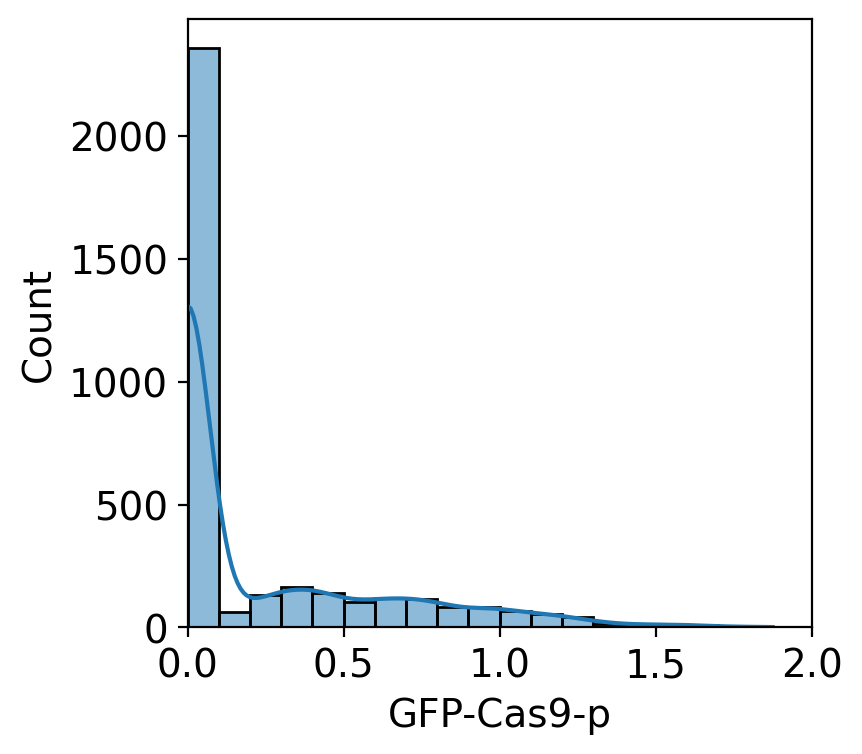

In [42]:
# plot the histogram of GFP expression in all cells
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs, x = 'GFP-Cas9-p', binwidth = 0.1, kde = True)
ax.set_xlim(0, 2)
ax.grid(False)
#plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/GFP-Cas9-P_hist.pdf', dpi = 300)
plt.show()
plt.close()

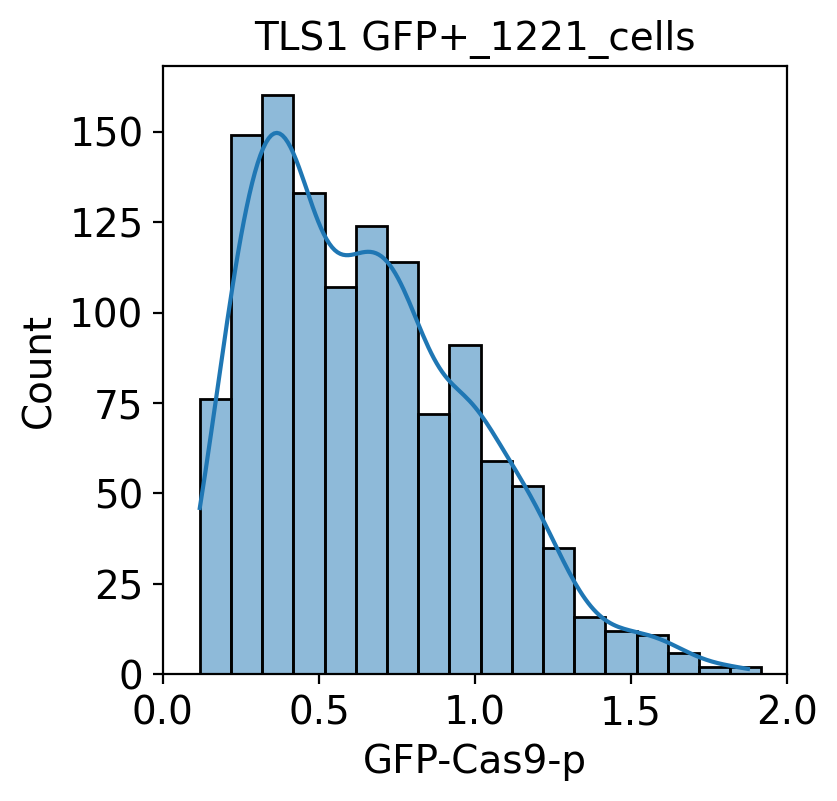

In [43]:
# Plot the histogram of GFP expression in GFP + cells
fig = plt.figure()
ax = sns.histplot(data = TLS1.obs[TLS1.obs['GFP_pos'] == 1], x = 'GFP-Cas9-p', binwidth = 0.1, kde = True)
ax.set_xlim(0, 2)
ax.grid(False)
ax.set_title('TLS1 GFP+_' + str(len(TLS1.obs[TLS1.obs['GFP_pos'] == 1]['GFP-Cas9-p'])) + '_cells')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/GFP-Cas9-P_GFP+_hist.pdf', dpi = 300)
plt.show()
plt.close()

### Plot the cell states in GFP+ and GFP- as a stacked bar

In [37]:
TLS1_GFPpos_cell_state_freq = {}
TLS1_GFPneg_cell_state_freq = {}
cell_states = colorDict.keys()

In [38]:
GFPpos = TLS1.obs[TLS1.obs['GFP_pos'] == 1]
GFPneg = TLS1.obs[TLS1.obs['GFP_pos'] == 0]

In [50]:
TLS1_GFPpos_total = len(GFPpos['cell_state'])
TLS1_GFPneg_total = len(GFPneg['cell_state'])

for cell_state in cell_states:
    TLS1_GFPpos_cell_state_freq[cell_state] = 100 * len(GFPpos[GFPpos['cell_state'] == cell_state]) / TLS1_GFPpos_total
    TLS1_GFPneg_cell_state_freq[cell_state] = 100 * len(GFPneg[GFPneg['cell_state'] == cell_state]) / TLS1_GFPneg_total

In [51]:
cell_percents = pd.DataFrame.from_dict([TLS1_GFPpos_cell_state_freq, TLS1_GFPneg_cell_state_freq])

In [52]:
cell_percents = cell_percents.rename(index = {0: "GFP+", 1: "GFP-"})
cell_percents

,pPSM,Somite,aPSM,NeuralTube1,NeuralTube2,Somite-1,Unknown,PCGLC,Somite0,NMPs,Endoderm,SomiteSclero,Endothelial,SomiteDermo
GFP+,1.392301,8.517609,1.310401,12.448812,12.039312,2.866503,0.655201,3.276003,5.651106,6.142506,5.569206,20.311220,1.064701,18.755119
GFP-,0.551783,7.555178,1.230900,10.611205,14.049236,3.268251,0.891341,3.862479,7.555178,5.263158,3.947368,24.575552,1.570458,15.067912


In [53]:
colors = []
for color in cell_percents.columns:
    colors.append(colorDict[color])

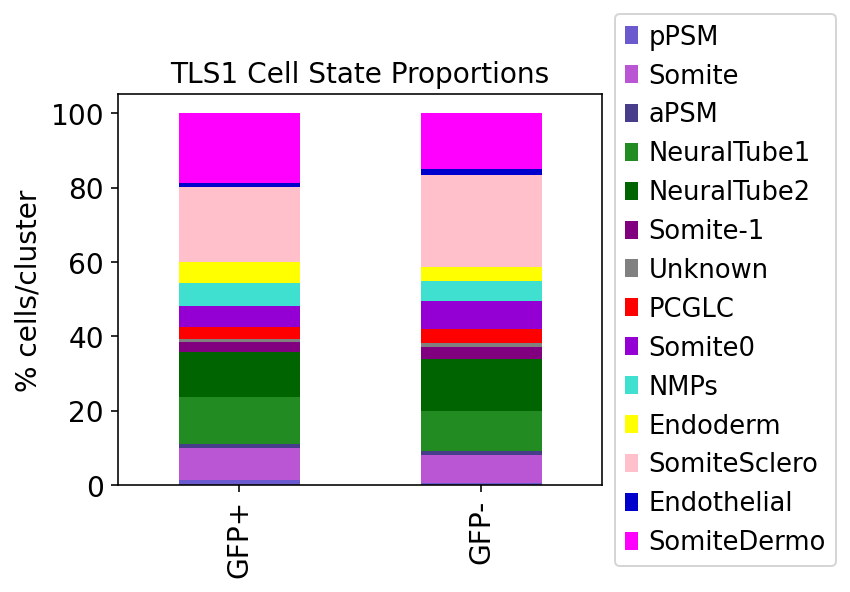

In [61]:
cell_percents.plot(kind='bar', use_index = True, stacked=True, color = colors, grid = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('TLS1 Cell State Proportions')
plt.ylabel('% cells/cluster')
plt.tight_layout()
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/TLS_1_GFP+_vs_GFP-_Cell_Percents.pdf', dpi = 900)
plt.show()
plt.close()

Text(0, 0.5, 'GFP-')

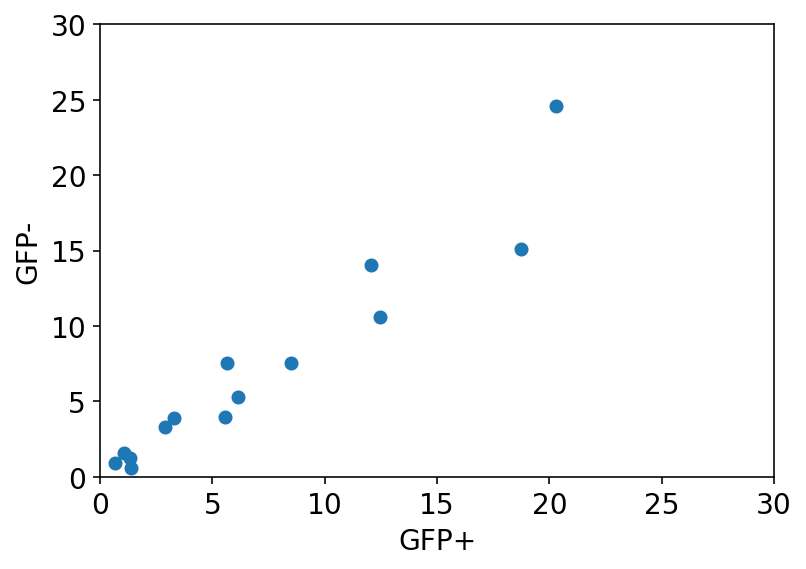

In [60]:
# Scatter plot of cell state proportions of GFP+ and GFP-. Each dot is 1 cell state
plt.scatter(x = cell_percents.loc['GFP+'], y = cell_percents.loc['GFP-'])
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.grid(False)
plt.xlabel('GFP+')
plt.ylabel('GFP-')

### Plot n of cells and proportions of cells for GFP+/- and pctCut +/-

In [44]:
TLS1.obs

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.0.5,seurat_clusters,UMAP_1,UMAP_2,BC,S.Score,G2M.Score,...,prediction.score.Seurat_13,prediction.score.Seurat_14,prediction.score.Seurat_15,prediction.score.max,pctCut,numTargetSites,numIndels,GFP-Cas9-p,GFP_pos,pctCut_pos
TLS_120h_rep1_AAACCCACACTACCGG-1,TLS_120h_rep1,25883.0,4987,NA,Seurat_12,NaN,NaN,NA,0.039316,-0.037742,...,0.0,0.0,0.0,0.954352,0.047619,7.0,1.0,0.000000,0,1
TLS_120h_rep1_AAACCCAGTAGCACGA-1,TLS_120h_rep1,27861.0,4976,NA,Seurat_9,NaN,NaN,NA,0.091867,-0.070693,...,0.0,0.0,0.0,0.920567,0.000000,8.0,0.0,0.000000,0,0
TLS_120h_rep1_AAACCCAGTCAACACT-1,TLS_120h_rep1,20013.0,4421,NA,Seurat_1,NaN,NaN,NA,0.152129,-0.141526,...,0.0,0.0,0.0,0.723794,0.142857,7.0,3.0,0.405249,1,1
TLS_120h_rep1_AAACCCATCATGAAAG-1,TLS_120h_rep1,24132.0,4579,NA,Seurat_0,NaN,NaN,NA,0.019673,-0.085390,...,0.0,0.0,0.0,0.723027,0.000000,8.0,0.0,0.000000,0,0
TLS_120h_rep1_AAACGAAAGGAATCGC-1,TLS_120h_rep1,18991.0,4040,NA,Seurat_0,NaN,NaN,NA,-0.101222,-0.184577,...,0.0,0.0,0.0,0.834519,0.000000,8.0,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLS_120h_rep1_TTTGGTTTCATGCGGC-1,TLS_120h_rep1,21389.0,4489,NA,Seurat_2,NaN,NaN,NA,-0.099652,0.032672,...,0.0,0.0,0.0,0.391508,0.166667,8.0,4.0,0.000000,0,1
TLS_120h_rep1_TTTGGTTTCGTTGTAG-1,TLS_120h_rep1,33071.0,5354,NA,Seurat_8,NaN,NaN,NA,0.045916,-0.231732,...,0.0,0.0,0.0,0.835076,0.047619,7.0,1.0,0.000000,0,1
TLS_120h_rep1_TTTGGTTTCTCGTGGG-1,TLS_120h_rep1,20472.0,4317,NA,Seurat_9,NaN,NaN,NA,0.147872,-0.221959,...,0.0,0.0,0.0,0.667789,0.000000,7.0,0.0,0.000000,0,0
TLS_120h_rep1_TTTGTTGAGAGCATAT-1,TLS_120h_rep1,19032.0,4124,NA,Seurat_6,NaN,NaN,NA,0.132008,-0.129799,...,0.0,0.0,0.0,0.700831,0.523810,7.0,11.0,0.422277,1,1


In [47]:
# % cut by cell cluster ID
cellCounts = TLS1.obs["cell_state"].value_counts()

x1 = TLS1.obs.groupby(["cell_state","GFP_pos"]).agg({"pctCut_pos":"count"}).reset_index()
x1.rename(columns = {"pctCut_pos": "n_count"},inplace=True)

b1 = x1[x1["GFP_pos"] == 1].reset_index(drop=True)
cellStateList = b1["cell_state"].tolist() #cellStateList
b1.set_index("cell_state",inplace=True)
b1["prop"] = b1["n_count"] / cellCounts[cellStateList]

b2 = x1[x1["GFP_pos"] == 0].reset_index(drop=True)
b2.set_index("cell_state",inplace=True)
b2["prop"] = b2["n_count"] / cellCounts[cellStateList]

x2 = TLS1.obs.groupby(["cell_state","pctCut_pos"]).agg({"GFP_pos":"count"}).reset_index()
x2.rename(columns={"GFP_pos": "n_count"},inplace=True)

p1 = x2[x2["pctCut_pos"] == 1].reset_index(drop=True)
p1.set_index("cell_state",inplace=True)
p1["prop"] = p1["n_count"]/cellCounts[cellStateList]

p2 = x2[x2["pctCut_pos"] == 0].reset_index(drop=True)
p2.set_index("cell_state",inplace=True)
p2["prop"] = p2["n_count"] / cellCounts[cellStateList]

,GFP_pos,n_count,prop
cell_state,,,
Endoderm,1,68,0.422360
Endothelial,1,13,0.260000
NMPs,1,75,0.376884
NeuralTube1,1,152,0.378109
NeuralTube2,1,147,0.307531
PCGLC,1,40,0.305344
Somite,1,104,0.368794
Somite0,1,69,0.279352
Somite-1,1,35,0.312500


In [60]:
b1

,GFP_pos,n_count,prop
cell_state,,,
Endoderm,1,68,0.422360
Endothelial,1,13,0.260000
NMPs,1,75,0.376884
NeuralTube1,1,152,0.378109
NeuralTube2,1,147,0.307531
PCGLC,1,40,0.305344
Somite,1,104,0.368794
Somite0,1,69,0.279352
Somite-1,1,35,0.312500


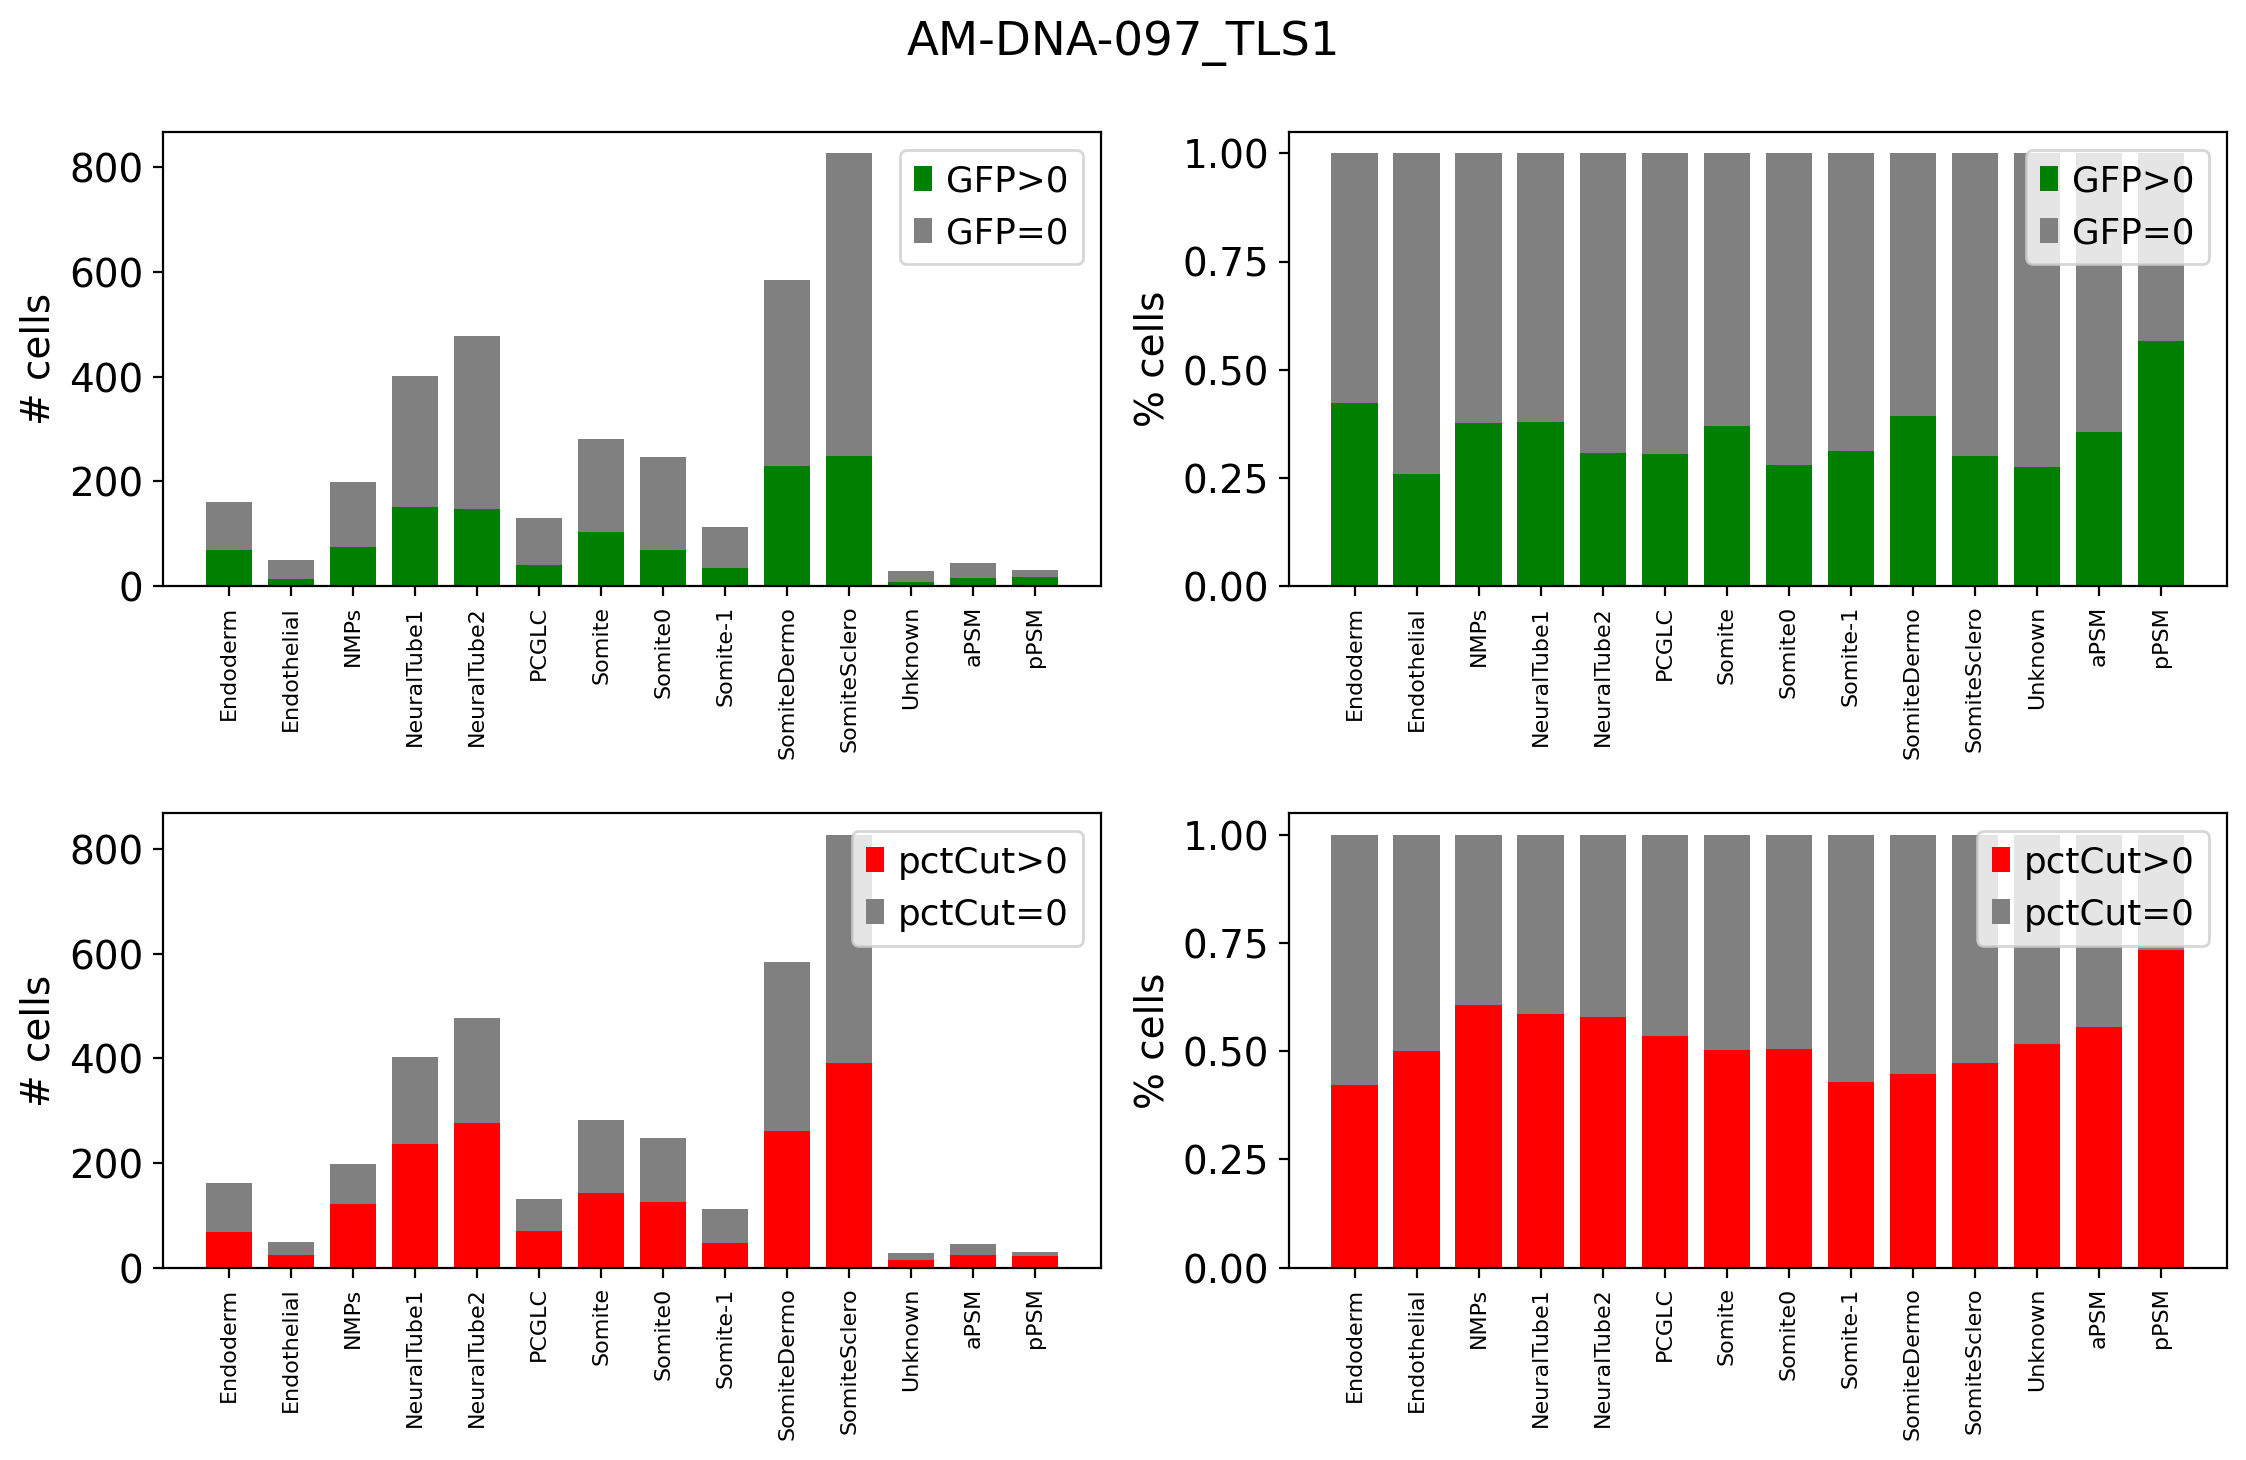

In [51]:
h = plt.figure(figsize=(12,8))

ax = plt.subplot(2,2,1)
plt.bar(np.arange(len(cellStateList)),b1["n_count"],0.75,label="GFP>0",color="Green")
plt.bar(np.arange(len(cellStateList)),b2["n_count"],0.75,bottom=b1["n_count"],label="GFP=0",color="Grey")
x1 = plt.xticks(np.arange(len(cellStateList)), cellStateList, rotation=90,fontsize=8)
plt.ylabel("# cells")
plt.grid(False)
plt.legend(loc="upper right")

ax = plt.subplot(2,2,2)
plt.bar(np.arange(len(cellStateList)),b1["prop"],0.75,label="GFP>0",color="Green")
plt.bar(np.arange(len(cellStateList)),b2["prop"],0.75,bottom=b1["prop"],label="GFP=0",color="Grey")
x1 = plt.xticks(np.arange(len(cellStateList)), cellStateList, rotation=90,fontsize=8)
plt.ylabel("% cells")
plt.grid(False)
plt.legend(loc="upper right")

ax = plt.subplot(2,2,3)
plt.bar(np.arange(len(cellStateList)),p1["n_count"],0.75,label="pctCut>0",color="Red")
plt.bar(np.arange(len(cellStateList)),p2["n_count"],0.75,bottom=p1["n_count"],label="pctCut=0",color="Grey")
x1 = plt.xticks(np.arange(len(cellStateList)), cellStateList, rotation=90,fontsize=8)
plt.ylabel("# cells")
plt.grid(False)
plt.legend(loc="upper right")

ax = plt.subplot(2,2,4)
plt.bar(np.arange(len(cellStateList)),p1["prop"],0.75,label="pctCut>0",color="Red")
plt.bar(np.arange(len(cellStateList)),p2["prop"],0.75,bottom=p1["prop"],label="pctCut=0",color="Grey")
x1 = plt.xticks(np.arange(len(cellStateList)), cellStateList, rotation=90,fontsize=8)
plt.ylabel("% cells")
plt.grid(False)
plt.legend(loc="upper right")

plt.suptitle(sName)
plt.subplots_adjust(left=0.1,bottom=0.2,hspace=0.5)
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/GFP_pctCut_by_cellType.pdf', dpi =900)

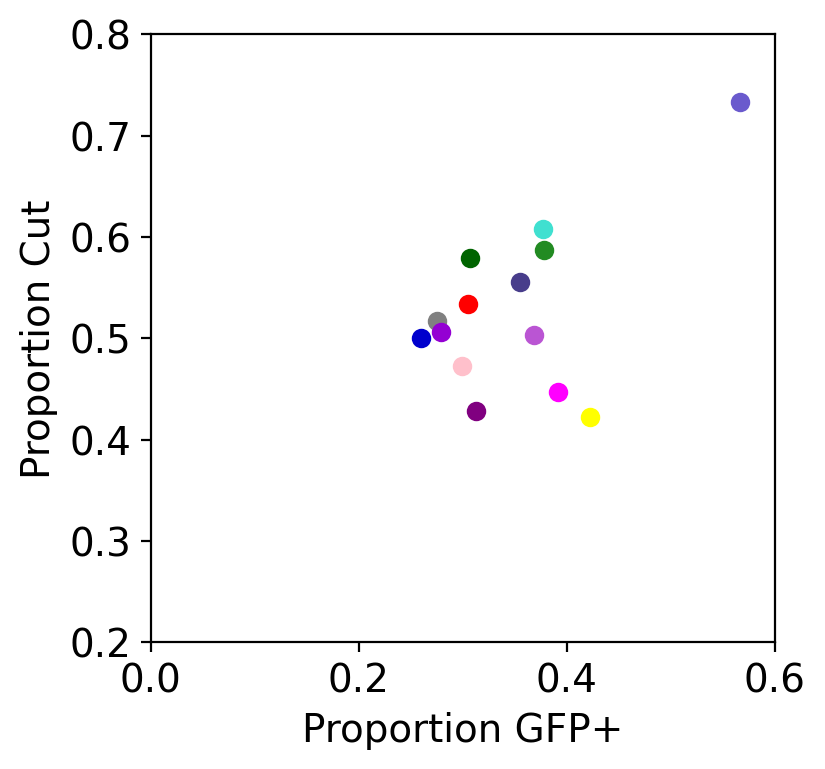

In [84]:
for cell_state in colorDict.keys():
    plt.scatter(b1.loc[cell_state]['prop'], p1.loc[cell_state]['prop'], color = colorDict[cell_state])
    
plt.grid(False)
plt.xlim(0, 0.6)
plt.ylim(0.2, 0.8)
plt.xlabel('Proportion GFP+')
plt.ylabel('Proportion Cut')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/Cut_vs_GFP_by_Cellstate.pdf', dpi = 900)
plt.show()
plt.close()

### Plot boxplots of pctCut in GFP+ and GFP- and GFP expression in Cut vs uncut

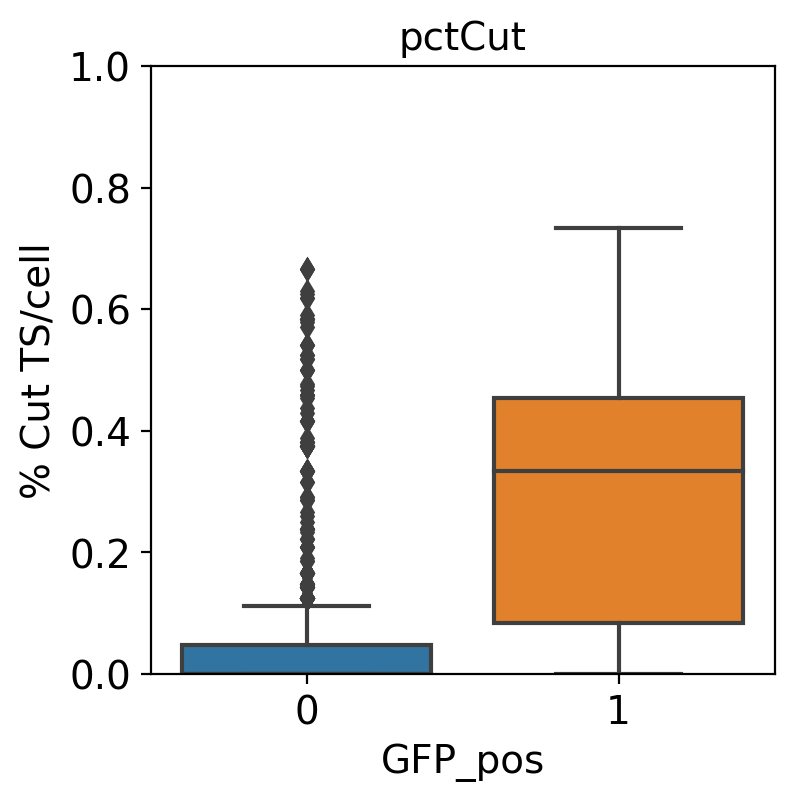

In [77]:
# boxplot of pctCut in GFP+ and GFP-
fig = plt.figure()
ax = sns.boxplot(data = TLS1.obs, x = 'GFP_pos', y = 'pctCut')
ax.set_ylim(0, 1)
ax.set_ylabel('% Cut TS/cell')
ax.grid(False)
ax.set_title('pctCut')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/PctCut_GFP+_vs_GFP-_boxplot.pdf', dpi = 900)
plt.show()
plt.close()

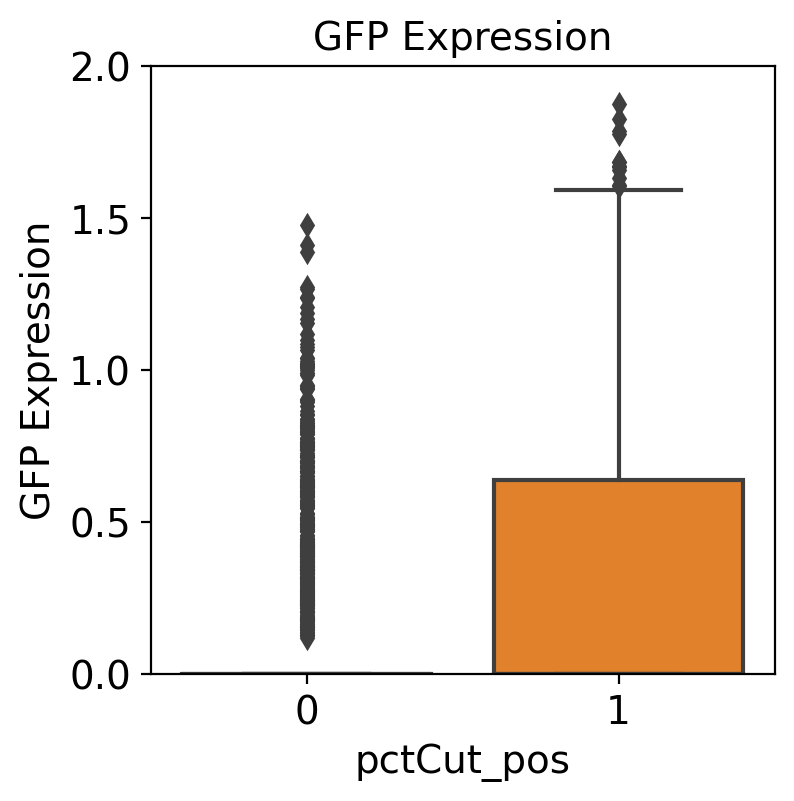

In [82]:
# boxplot of pctCut in GFP+ and GFP-
fig = plt.figure()
ax = sns.boxplot(data = TLS1.obs, x = 'pctCut_pos', y = 'GFP-Cas9-p')
ax.set_ylim(0, 2)
ax.set_ylabel('GFP Expression')
ax.grid(False)
ax.set_title('GFP Expression')
plt.savefig('/Genomics/chanlab/blaw/TLS/data/AM-DNA-097/lineage/3_tree_characteristics/GFP_Cut_vs_Uncut_boxplot.pdf', dpi = 900)
plt.show()
plt.close()